In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("paper")
import matplotlib.ticker as ticker

from tqdm import tqdm # progress bars :)
tqdm.pandas()
from sklearn.metrics import r2_score
import scipy as sp

In [2]:
ep = pd.read_csv("gtdb-rs202.evolpaths.protein.csv.gz")
ep

comparison_name      anchor_name     compare_name  \
0       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
1       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
2       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
3       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
4       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
...                                   ...              ...              ...   
368545  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
368546  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
368547  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368548  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368549  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   

           path lowest_common_rank alphabet  ksize  scaled   jaccard  \
0         path1              genus  protein      7       1  0.253707   
1         path1              genus  protein      7     100  0.257015   
2         path1              genus  protein      7     200  0.256108   
3         path1             family  protein      7       1  0.027498   
4         path1             family  protein      7     100  0.027745   
...         ...                ...      ...    ...     ...       ...   
368545  path999             phylum  protein     11     100  0.001703   
368546  path999             phylum  protein     11     200  0.001819   
368547  path999       superkingdom  protein     11       1  0.000687   
368548  path999       superkingdom  protein     11     100  0.000427   
368549  path999       superkingdom  protein     11     200  0.000666   

        max_containment  ...  EzAAIm coverage threshold  EzAAIb AAI  \
0              0.606440  ...                        0.5    0.929249   
1              0.615836  ...                        0.5    0.929249   
2              0.608974  ...                        0.5    0.929249   
3              0.084305  ...                        0.5    0.634232   
4              0.084447  ...                        0.5    0.634232   
...                 ...  ...                        ...         ...   
368545         0.003699  ...                        0.5    0.507907   
368546         0.003919  ...                        0.5    0.507907   
368547         0.001424  ...                        0.5    0.484488   
368548         0.000885  ...                        0.5    0.484488   
368549         0.001392  ...                        0.5    0.484488   

        EzAAIb anchor CDS count  EzAAIb compare CDS count  \
0                          1965                      3590   
1                          1965                      3590   
2                          1965                      3590   
3                          1965                      3596   
4                          1965                      3596   
...                         ...                       ...   
368545                     3045                      2723   
368546                     3045                      2723   
368547                     3045                      3603   
368548                     3045                      3603   
368549                     3045                      3603   

        EzAAIb matched CDS count  EzAAIb proteome coverage  \
0                           1583                  0.569937   
1                           1583                  0.569937   
2                           1583                  0.569937   
3                           1057                  0.380147   
4                           1057                  0.380147   
...                          ...                       ...   
368545                       369                  0.127947   
368546                       369                  0.127947   
368547                       283                  0.085138   
368548

In [3]:
ep.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard AAI',
       'jani_low', 'jani_high', 'containA AAI', 'containAaai_low',
       'containAaai_high', 'containB AAI', 'containBaai_low',
       'containBaai_high', 'maxContain AAI', 'mcANI_low', 'mcANI_high',
       'jaccard_warning', 'alpha-ksize', 'compareM AAI', 'compareM_std_aai',
       'genes_in_anchor', 'genes_in_ref', 'orthologous_genes',
       'orthologous_fraction', 'ANIb ident', 'ANIb_coverage',
       'ANIb_aln_length', 'ANIb_sim_errors', 'ANIb_hadamard', 'ANIm ident',
       'ANIm_coverage', 'ANIm_aln_length', 'ANIm_sim_errors', 'ANIm_hadamard',
       'fastani ANI', 'num_bidirectional_fragment_mappings',
       'total_query_fragments', 'EzAAIm AAI', 'EzAAIm anchor CDS count',
       'EzAAIm compare CDS cou

In [4]:
len(ep[ep["compareM AAI"].notna()])

368550

In [5]:
len(ep[ep["EzAAIm AAI"].notna()] )

368550

In [6]:
cM_as_std = ep[ep["compareM AAI"].notna()] # only grab comparisons we can work with
cM_as_std

comparison_name      anchor_name     compare_name  \
0       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
1       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
2       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
3       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
4       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
...                                   ...              ...              ...   
368545  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
368546  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
368547  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368548  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368549  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   

           path lowest_common_rank alphabet  ksize  scaled   jaccard  \
0         path1              genus  protein      7       1  0.253707   
1         path1              genus  protein      7     100  0.257015   
2         path1              genus  protein      7     200  0.256108   
3         path1             family  protein      7       1  0.027498   
4         path1             family  protein      7     100  0.027745   
...         ...                ...      ...    ...     ...       ...   
368545  path999             phylum  protein     11     100  0.001703   
368546  path999             phylum  protein     11     200  0.001819   
368547  path999       superkingdom  protein     11       1  0.000687   
368548  path999       superkingdom  protein     11     100  0.000427   
368549  path999       superkingdom  protein     11     200  0.000666   

        max_containment  ...  EzAAIm coverage threshold  EzAAIb AAI  \
0              0.606440  ...                        0.5    0.929249   
1              0.615836  ...                        0.5    0.929249   
2              0.608974  ...                        0.5    0.929249   
3              0.084305  ...                        0.5    0.634232   
4              0.084447  ...                        0.5    0.634232   
...                 ...  ...                        ...         ...   
368545         0.003699  ...                        0.5    0.507907   
368546         0.003919  ...                        0.5    0.507907   
368547         0.001424  ...                        0.5    0.484488   
368548         0.000885  ...                        0.5    0.484488   
368549         0.001392  ...                        0.5    0.484488   

        EzAAIb anchor CDS count  EzAAIb compare CDS count  \
0                          1965                      3590   
1                          1965                      3590   
2                          1965                      3590   
3                          1965                      3596   
4                          1965                      3596   
...                         ...                       ...   
368545                     3045                      2723   
368546                     3045                      2723   
368547                     3045                      3603   
368548                     3045                      3603   
368549                     3045                      3603   

        EzAAIb matched CDS count  EzAAIb proteome coverage  \
0                           1583                  0.569937   
1                           1583                  0.569937   
2                           1583                  0.569937   
3                           1057                  0.380147   
4                           1057                  0.380147   
...                          ...                       ...   
368545                       369                  0.127947   
368546                       369                  0.127947   
368547                       283                  0.085138   
368548

In [7]:
eM_as_std = ep[ep["EzAAIm AAI"].notna()] # only grab comparisons we can work with
eM_as_std

comparison_name      anchor_name     compare_name  \
0       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
1       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
2       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
3       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
4       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
...                                   ...              ...              ...   
368545  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
368546  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
368547  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368548  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368549  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   

           path lowest_common_rank alphabet  ksize  scaled   jaccard  \
0         path1              genus  protein      7       1  0.253707   
1         path1              genus  protein      7     100  0.257015   
2         path1              genus  protein      7     200  0.256108   
3         path1             family  protein      7       1  0.027498   
4         path1             family  protein      7     100  0.027745   
...         ...                ...      ...    ...     ...       ...   
368545  path999             phylum  protein     11     100  0.001703   
368546  path999             phylum  protein     11     200  0.001819   
368547  path999       superkingdom  protein     11       1  0.000687   
368548  path999       superkingdom  protein     11     100  0.000427   
368549  path999       superkingdom  protein     11     200  0.000666   

        max_containment  ...  EzAAIm coverage threshold  EzAAIb AAI  \
0              0.606440  ...                        0.5    0.929249   
1              0.615836  ...                        0.5    0.929249   
2              0.608974  ...                        0.5    0.929249   
3              0.084305  ...                        0.5    0.634232   
4              0.084447  ...                        0.5    0.634232   
...                 ...  ...                        ...         ...   
368545         0.003699  ...                        0.5    0.507907   
368546         0.003919  ...                        0.5    0.507907   
368547         0.001424  ...                        0.5    0.484488   
368548         0.000885  ...                        0.5    0.484488   
368549         0.001392  ...                        0.5    0.484488   

        EzAAIb anchor CDS count  EzAAIb compare CDS count  \
0                          1965                      3590   
1                          1965                      3590   
2                          1965                      3590   
3                          1965                      3596   
4                          1965                      3596   
...                         ...                       ...   
368545                     3045                      2723   
368546                     3045                      2723   
368547                     3045                      3603   
368548                     3045                      3603   
368549                     3045                      3603   

        EzAAIb matched CDS count  EzAAIb proteome coverage  \
0                           1583                  0.569937   
1                           1583                  0.569937   
2                           1583                  0.569937   
3                           1057                  0.380147   
4                           1057                  0.380147   
...                          ...                       ...   
368545                       369                  0.127947   
368546                       369                  0.127947   
368547                       283                  0.085138   
368548

In [54]:
eM_as_std[["EzAAIm AAI",  "EzAAIb AAI", "compareM AAI", "compareM_std_aai", "jani_low", "jani_high"]]

EzAAIm AAI  EzAAIb AAI  compareM AAI  compareM_std_aai  jani_low  \
0         0.929069    0.929249        0.9242            0.0952  1.000000   
1         0.929069    0.929249        0.9242            0.0952  0.876950   
2         0.929069    0.929249        0.9242            0.0952  0.875328   
3         0.631682    0.634232        0.6116            0.1285  1.000000   
4         0.631682    0.634232        0.6116            0.1285  0.650283   
...            ...         ...           ...               ...       ...   
368545    0.507298    0.507907        0.4496            0.0983  0.577873   
368546    0.507298    0.507907        0.4496            0.0983  0.574786   
368547    0.485674    0.484488        0.4195            0.0879  0.544589   
368548    0.485674    0.484488        0.4195            0.0879  0.495990   
368549    0.485674    0.484488        0.4195            0.0879  0.512647   

        jani_high  
0        1.000000  
1        0.883182  
2        0.884076  
3        1.000000  
4        0.667869  
...           ...  
368545   0.615702  
368546   0.626414  
368547   0.554095  
368548   0.558073  
368549   0.585226  

[368550 rows x 6 columns]

In [9]:
def aai_in_ci(row):
    row["aai_in_mc_ci"] = False
    row["aai_in_jaccard_ci"] = False
    compareM_mean = float(row["compareM AAI"])
    compareM_stdev = float(row["compareM_std_aai"])
    compareM_low = compareM_mean - compareM_stdev
    compareM_high = compareM_mean + compareM_stdev
    ezAAIm = float(row["EzAAIm AAI"])
    mc_low = float(row["mcANI_low"])
    mc_high = float(row["mcANI_high"])
    if (mc_low <= compareM_low) & (compareM_high <= mc_high):
        row["cM_aai_in_mc_ci"] = True
    if (mc_low <= ezAAIm) & (ezAAIm <= mc_high):
        row["eM_aai_in_mc_ci"] = True
    jaai_low = float(row["jani_low"])
    jaai_high = float(row["jani_high"])
    if (jaai_low <= compareM_low) & (compareM_high <= jaai_high):
        row["cM_aai_in_jaccard_ci"] = True
    if (jaai_low <= ezAAIm) & (ezAAIm <= jaai_high):
        row["eM_aai_in_jaccard_ci"] = True
    return row

In [10]:
# ACTUALLY, just look at ezAAIm
def ezAAIm_aai_in_ci(row):
    row["aai_in_mc_ci"] = False
    row["aai_in_jaccard_ci"] = False
    ezAAIm = float(row["EzAAIm AAI"])
    mc_low = float(row["mcANI_low"])
    mc_high = float(row["mcANI_high"])
    if (mc_low <= ezAAIm) & (ezAAIm <= mc_high):
        row["aai_in_mc_ci"] = True
    jaai_low = float(row["jani_low"])
    jaai_high = float(row["jani_high"])
    if (jaai_low <= ezAAIm) & (ezAAIm <= jaai_high):
        row["aai_in_jaccard_ci"] = True
    return row

In [11]:
#ezAAIm_as_std = ezAAIm_as_std.progress_apply(aai_in_ci, axis=1)
eM_as_std = eM_as_std.progress_apply(ezAAIm_aai_in_ci, axis=1)
eM_as_std

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 368550/368550 [06:33<00:00, 936.73it/s]


comparison_name      anchor_name     compare_name  \
0       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
1       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
2       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
3       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
4       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
...                                   ...              ...              ...   
368545  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
368546  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
368547  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368548  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368549  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   

           path lowest_common_rank alphabet  ksize  scaled   jaccard  \
0         path1              genus  protein      7       1  0.253707   
1         path1              genus  protein      7     100  0.257015   
2         path1              genus  protein      7     200  0.256108   
3         path1             family  protein      7       1  0.027498   
4         path1             family  protein      7     100  0.027745   
...         ...                ...      ...    ...     ...       ...   
368545  path999             phylum  protein     11     100  0.001703   
368546  path999             phylum  protein     11     200  0.001819   
368547  path999       superkingdom  protein     11       1  0.000687   
368548  path999       superkingdom  protein     11     100  0.000427   
368549  path999       superkingdom  protein     11     200  0.000666   

        max_containment  ...  EzAAIb anchor CDS count  \
0              0.606440  ...                     1965   
1              0.615836  ...                     1965   
2              0.608974  ...                     1965   
3              0.084305  ...                     1965   
4              0.084447  ...                     1965   
...                 ...  ...                      ...   
368545         0.003699  ...                     3045   
368546         0.003919  ...                     3045   
368547         0.001424  ...                     3045   
368548         0.000885  ...                     3045   
368549         0.001392  ...                     3045   

        EzAAIb compare CDS count  EzAAIb matched CDS count  \
0                           3590                      1583   
1                           3590                      1583   
2                           3590                      1583   
3                           3596                      1057   
4                           3596                      1057   
...                          ...                       ...   
368545                      2723                       369   
368546                      2723                       369   
368547                      3603                       283   
368548                      3603                       283   
368549                      3603                       283   

        EzAAIb proteome coverage  EzAAIb id threshold  \
0                       0.569937                  0.3   
1                       0.569937                  0.3   
2                       0.569937                  0.3   
3                       0.380147                  0.3   
4                       0.380147                  0.3   
...                          ...                  ...   
368545                  0.127947                  0.3   
368546                  0.127947                  0.3   
368547                  0.085138                  0.3   
368548                  0.085138                  0.3   
368549                  0.085138                  0.3   

        EzAAIb coverage threshold  minContain AAI  avgContain AAI  \
0                           

In [12]:
in_mcCI = eM_as_std[eM_as_std["aai_in_mc_ci"] ==True]
in_mcCI

comparison_name      anchor_name     compare_name  \
2       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
16      GCA_004524385.1_x_GCF_000023945.1  GCA_004524385.1  GCF_000023945.1   
17      GCA_004524385.1_x_GCF_000023945.1  GCA_004524385.1  GCF_000023945.1   
19      GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
20      GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
...                                   ...              ...              ...   
368510  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
368512  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368513  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368530  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368531  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   

           path lowest_common_rank alphabet  ksize  scaled   jaccard  \
2         path1              genus  protein      7     200  0.256108   
16        path1       superkingdom  protein      7     100  0.002033   
17        path1       superkingdom  protein      7     200  0.002318   
19        path1              genus  protein      8     100  0.230212   
20        path1              genus  protein      8     200  0.233418   
...         ...                ...      ...    ...     ...       ...   
368510  path999             phylum  protein      9     200  0.001520   
368512  path999       superkingdom  protein      9     100  0.001003   
368513  path999       superkingdom  protein      9     200  0.001157   
368530  path999       superkingdom  protein     10     100  0.000573   
368531  path999       superkingdom  protein     10     200  0.000677   

        max_containment  ...  EzAAIb anchor CDS count  \
2              0.608974  ...                     1965   
16             0.005670  ...                     1965   
17             0.006410  ...                     1965   
19             0.568399  ...                     1965   
20             0.569536  ...                     1965   
...                 ...  ...                      ...   
368510         0.003380  ...                     3045   
368512         0.002053  ...                     3045   
368513         0.002360  ...                     3045   
368530         0.001179  ...                     3045   
368531         0.001364  ...                     3045   

        EzAAIb compare CDS count  EzAAIb matched CDS count  \
2                           3590                      1583   
16                          3052                        84   
17                          3052                        84   
19                          3590                      1583   
20                          3590                      1583   
...                          ...                       ...   
368510                      2723                       369   
368512                      3603                       283   
368513                      3603                       283   
368530                      3603                       283   
368531                      3603                       283   

        EzAAIb proteome coverage  EzAAIb id threshold  \
2                       0.569937                  0.3   
16                      0.033486                  0.3   
17                      0.033486                  0.3   
19                      0.569937                  0.3   
20                      0.569937                  0.3   
...                          ...                  ...   
368510                  0.127947                  0.3   
368512                  0.085138                  0.3   
368513                  0.085138                  0.3   
368530                  0.085138                  0.3   
368531                  0.085138                  0.3   

        EzAAIb coverage threshold  minContain AAI  avgContain AAI  \
2                           

In [13]:
in_mcCI.groupby(["scaled", "ksize"])[["aai_in_mc_ci"]].describe()

aai_in_mc_ci                   
                    count unique   top  freq
scaled ksize                                
1      7              103      1  True   103
       8              129      1  True   129
       9               55      1  True    55
       10              29      1  True    29
       11              17      1  True    17
100    7             1358      1  True  1358
       8             1333      1  True  1333
       9             1009      1  True  1009
       10             739      1  True   739
       11             505      1  True   505
200    7             2324      1  True  2324
       8             2769      1  True  2769
       9             2210      1  True  2210
       10            2019      1  True  2019
       11             922      1  True   922

In [14]:
in_jCI = eM_as_std[eM_as_std["aai_in_jaccard_ci"] ==True]
in_jCI

comparison_name      anchor_name     compare_name  \
13      GCA_004524385.1_x_GCA_004524565.1  GCA_004524385.1  GCA_004524565.1   
14      GCA_004524385.1_x_GCA_004524565.1  GCA_004524385.1  GCA_004524565.1   
16      GCA_004524385.1_x_GCF_000023945.1  GCA_004524385.1  GCF_000023945.1   
17      GCA_004524385.1_x_GCF_000023945.1  GCA_004524385.1  GCF_000023945.1   
25      GCA_004524385.1_x_GCF_008000775.1  GCA_004524385.1  GCF_008000775.1   
...                                   ...              ...              ...   
368510  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
368512  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368513  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368530  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
368531  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   

           path lowest_common_rank alphabet  ksize  scaled   jaccard  \
13        path1             phylum  protein      7     100  0.003528   
14        path1             phylum  protein      7     200  0.003355   
16        path1       superkingdom  protein      7     100  0.002033   
17        path1       superkingdom  protein      7     200  0.002318   
25        path1              order  protein      8     100  0.002708   
...         ...                ...      ...    ...     ...       ...   
368510  path999             phylum  protein      9     200  0.001520   
368512  path999       superkingdom  protein      9     100  0.001003   
368513  path999       superkingdom  protein      9     200  0.001157   
368530  path999       superkingdom  protein     10     100  0.000573   
368531  path999       superkingdom  protein     10     200  0.000677   

        max_containment  ...  EzAAIb anchor CDS count  \
13             0.009923  ...                     1965   
14             0.009215  ...                     1965   
16             0.005670  ...                     1965   
17             0.006410  ...                     1965   
25             0.009771  ...                     1965   
...                 ...  ...                      ...   
368510         0.003380  ...                     3045   
368512         0.002053  ...                     3045   
368513         0.002360  ...                     3045   
368530         0.001179  ...                     3045   
368531         0.001364  ...                     3045   

        EzAAIb compare CDS count  EzAAIb matched CDS count  \
13                          3124                       183   
14                          3124                       183   
16                          3052                        84   
17                          3052                        84   
25                          3935                       482   
...                          ...                       ...   
368510                      2723                       369   
368512                      3603                       283   
368513                      3603                       283   
368530                      3603                       283   
368531                      3603                       283   

        EzAAIb proteome coverage  EzAAIb id threshold  \
13                      0.071920                  0.3   
14                      0.071920                  0.3   
16                      0.033486                  0.3   
17                      0.033486                  0.3   
25                      0.163390                  0.3   
...                          ...                  ...   
368510                  0.127947                  0.3   
368512                  0.085138                  0.3   
368513                  0.085138                  0.3   
368530                  0.085138                  0.3   
368531                  0.085138                  0.3   

        EzAAIb coverage threshold  minContain AAI  avgContain AAI  \
13                          

In [15]:
in_jCI.groupby(["scaled", "ksize"])[["aai_in_jaccard_ci"]].describe()

aai_in_jaccard_ci                   
                         count unique   top  freq
scaled ksize                                     
1      7                   363      1  True   363
       8                   494      1  True   494
       9                   224      1  True   224
       10                  107      1  True   107
       11                   35      1  True    35
100    7                  3760      1  True  3760
       8                  3879      1  True  3879
       9                  2707      1  True  2707
       10                 1748      1  True  1748
       11                 1074      1  True  1074
200    7                  5232      1  True  5232
       8                  5764      1  True  5764
       9                  4190      1  True  4190
       10                 3505      1  True  3505
       11                 1753      1  True  1753

In [16]:
ep.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard AAI',
       'jani_low', 'jani_high', 'containA AAI', 'containAaai_low',
       'containAaai_high', 'containB AAI', 'containBaai_low',
       'containBaai_high', 'maxContain AAI', 'mcANI_low', 'mcANI_high',
       'jaccard_warning', 'alpha-ksize', 'compareM AAI', 'compareM_std_aai',
       'genes_in_anchor', 'genes_in_ref', 'orthologous_genes',
       'orthologous_fraction', 'ANIb ident', 'ANIb_coverage',
       'ANIb_aln_length', 'ANIb_sim_errors', 'ANIb_hadamard', 'ANIm ident',
       'ANIm_coverage', 'ANIm_aln_length', 'ANIm_sim_errors', 'ANIm_hadamard',
       'fastani ANI', 'num_bidirectional_fragment_mappings',
       'total_query_fragments', 'EzAAIm AAI', 'EzAAIm anchor CDS count',
       'EzAAIm compare CDS cou

## for now, use Compare M as "gold standard"
TO DO: substitute 1. mmseqs EzAAI, or 2. BLAST EzAAI, if i can get it.

In [17]:
compare_id_vars = ["comparison_name", "path", 
                   "lowest_common_rank", "anchor_name", 
                   "compare_name", "alpha-ksize", 
                   "alphabet", "ksize","scaled", 
                   #"fastani ANI", "ANIm ident", 
                    #"ANIb ident", "ANIb_coverage",
                   "compareM AAI"]

prot_value_vars = ["jaccard AAI", "containA AAI", 
                   "containB AAI", "maxContain AAI", 
                   "minContain AAI", "avgContain AAI"]

In [18]:
melted=pd.melt(ep,id_vars= compare_id_vars,
                     value_vars=prot_value_vars,
                     var_name='estimator', value_name='AAI')
melted

comparison_name     path lowest_common_rank  \
0        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
1        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
3        GCA_004524385.1_x_GCA_011364975.1    path1             family   
4        GCA_004524385.1_x_GCA_011364975.1    path1             family   
...                                    ...      ...                ...   
2211295  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
2211296  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
2211297  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
2211298  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
2211299  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

             anchor_name     compare_name alpha-ksize alphabet  ksize  scaled  \
0        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7       1   
1        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     100   
2        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     200   
3        GCA_004524385.1  GCA_011364975.1   protein-7  protein      7       1   
4        GCA_004524385.1  GCA_011364975.1   protein-7  protein      7     100   
...                  ...              ...         ...      ...    ...     ...   
2211295  GCA_002409405.1  GCA_003567135.1  protein-11  protein     11     100   
2211296  GCA_002409405.1  GCA_003567135.1  protein-11  protein     11     200   
2211297  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11       1   
2211298  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11     100   
2211299  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11     200   

         compareM AAI       estimator       AAI  
0              0.9242     jaccard AAI  0.878781  
1              0.9242     jaccard AAI  0.880078  
2              0.9242     jaccard AAI  0.879724  
3              0.6116     jaccard AAI  0.658210  
4              0.6116     jaccard AAI  0.659027  
...               ...             ...       ...  
2211295        0.4496  avgContain AAI  0.596669  
2211296        0.4496  avgContain AAI  0.600200  
2211297        0.4195  avgContain AAI  0.549325  
2211298        0.4195  avgContain AAI  0.526113  
2211299        0.4195  avgContain AAI  0.547770  

[2211300 rows x 12 columns]

In [19]:
melted["AAIdiff"] = melted["AAI"] - melted['compareM AAI']
melted

comparison_name     path lowest_common_rank  \
0        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
1        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
3        GCA_004524385.1_x_GCA_011364975.1    path1             family   
4        GCA_004524385.1_x_GCA_011364975.1    path1             family   
...                                    ...      ...                ...   
2211295  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
2211296  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
2211297  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
2211298  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
2211299  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

             anchor_name     compare_name alpha-ksize alphabet  ksize  scaled  \
0        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7       1   
1        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     100   
2        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     200   
3        GCA_004524385.1  GCA_011364975.1   protein-7  protein      7       1   
4        GCA_004524385.1  GCA_011364975.1   protein-7  protein      7     100   
...                  ...              ...         ...      ...    ...     ...   
2211295  GCA_002409405.1  GCA_003567135.1  protein-11  protein     11     100   
2211296  GCA_002409405.1  GCA_003567135.1  protein-11  protein     11     200   
2211297  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11       1   
2211298  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11     100   
2211299  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11     200   

         compareM AAI       estimator       AAI   AAIdiff  
0              0.9242     jaccard AAI  0.878781 -0.045419  
1              0.9242     jaccard AAI  0.880078 -0.044122  
2              0.9242     jaccard AAI  0.879724 -0.044476  
3              0.6116     jaccard AAI  0.658210  0.046610  
4              0.6116     jaccard AAI  0.659027  0.047427  
...               ...             ...       ...       ...  
2211295        0.4496  avgContain AAI  0.596669  0.147069  
2211296        0.4496  avgContain AAI  0.600200  0.150600  
2211297        0.4195  avgContain AAI  0.549325  0.129825  
2211298        0.4195  avgContain AAI  0.526113  0.106613  
2211299        0.4195  avgContain AAI  0.547770  0.128270  

[2211300 rows x 13 columns]

In [20]:
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]

aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "ezAAIm AAI": "#4E0707"}

In [21]:
melted['scaled'].unique()

array([  1, 100, 200])

In [22]:
scaled200 = melted[melted["scaled"] == 200]
scaled1 = melted[melted["scaled"] == 1]

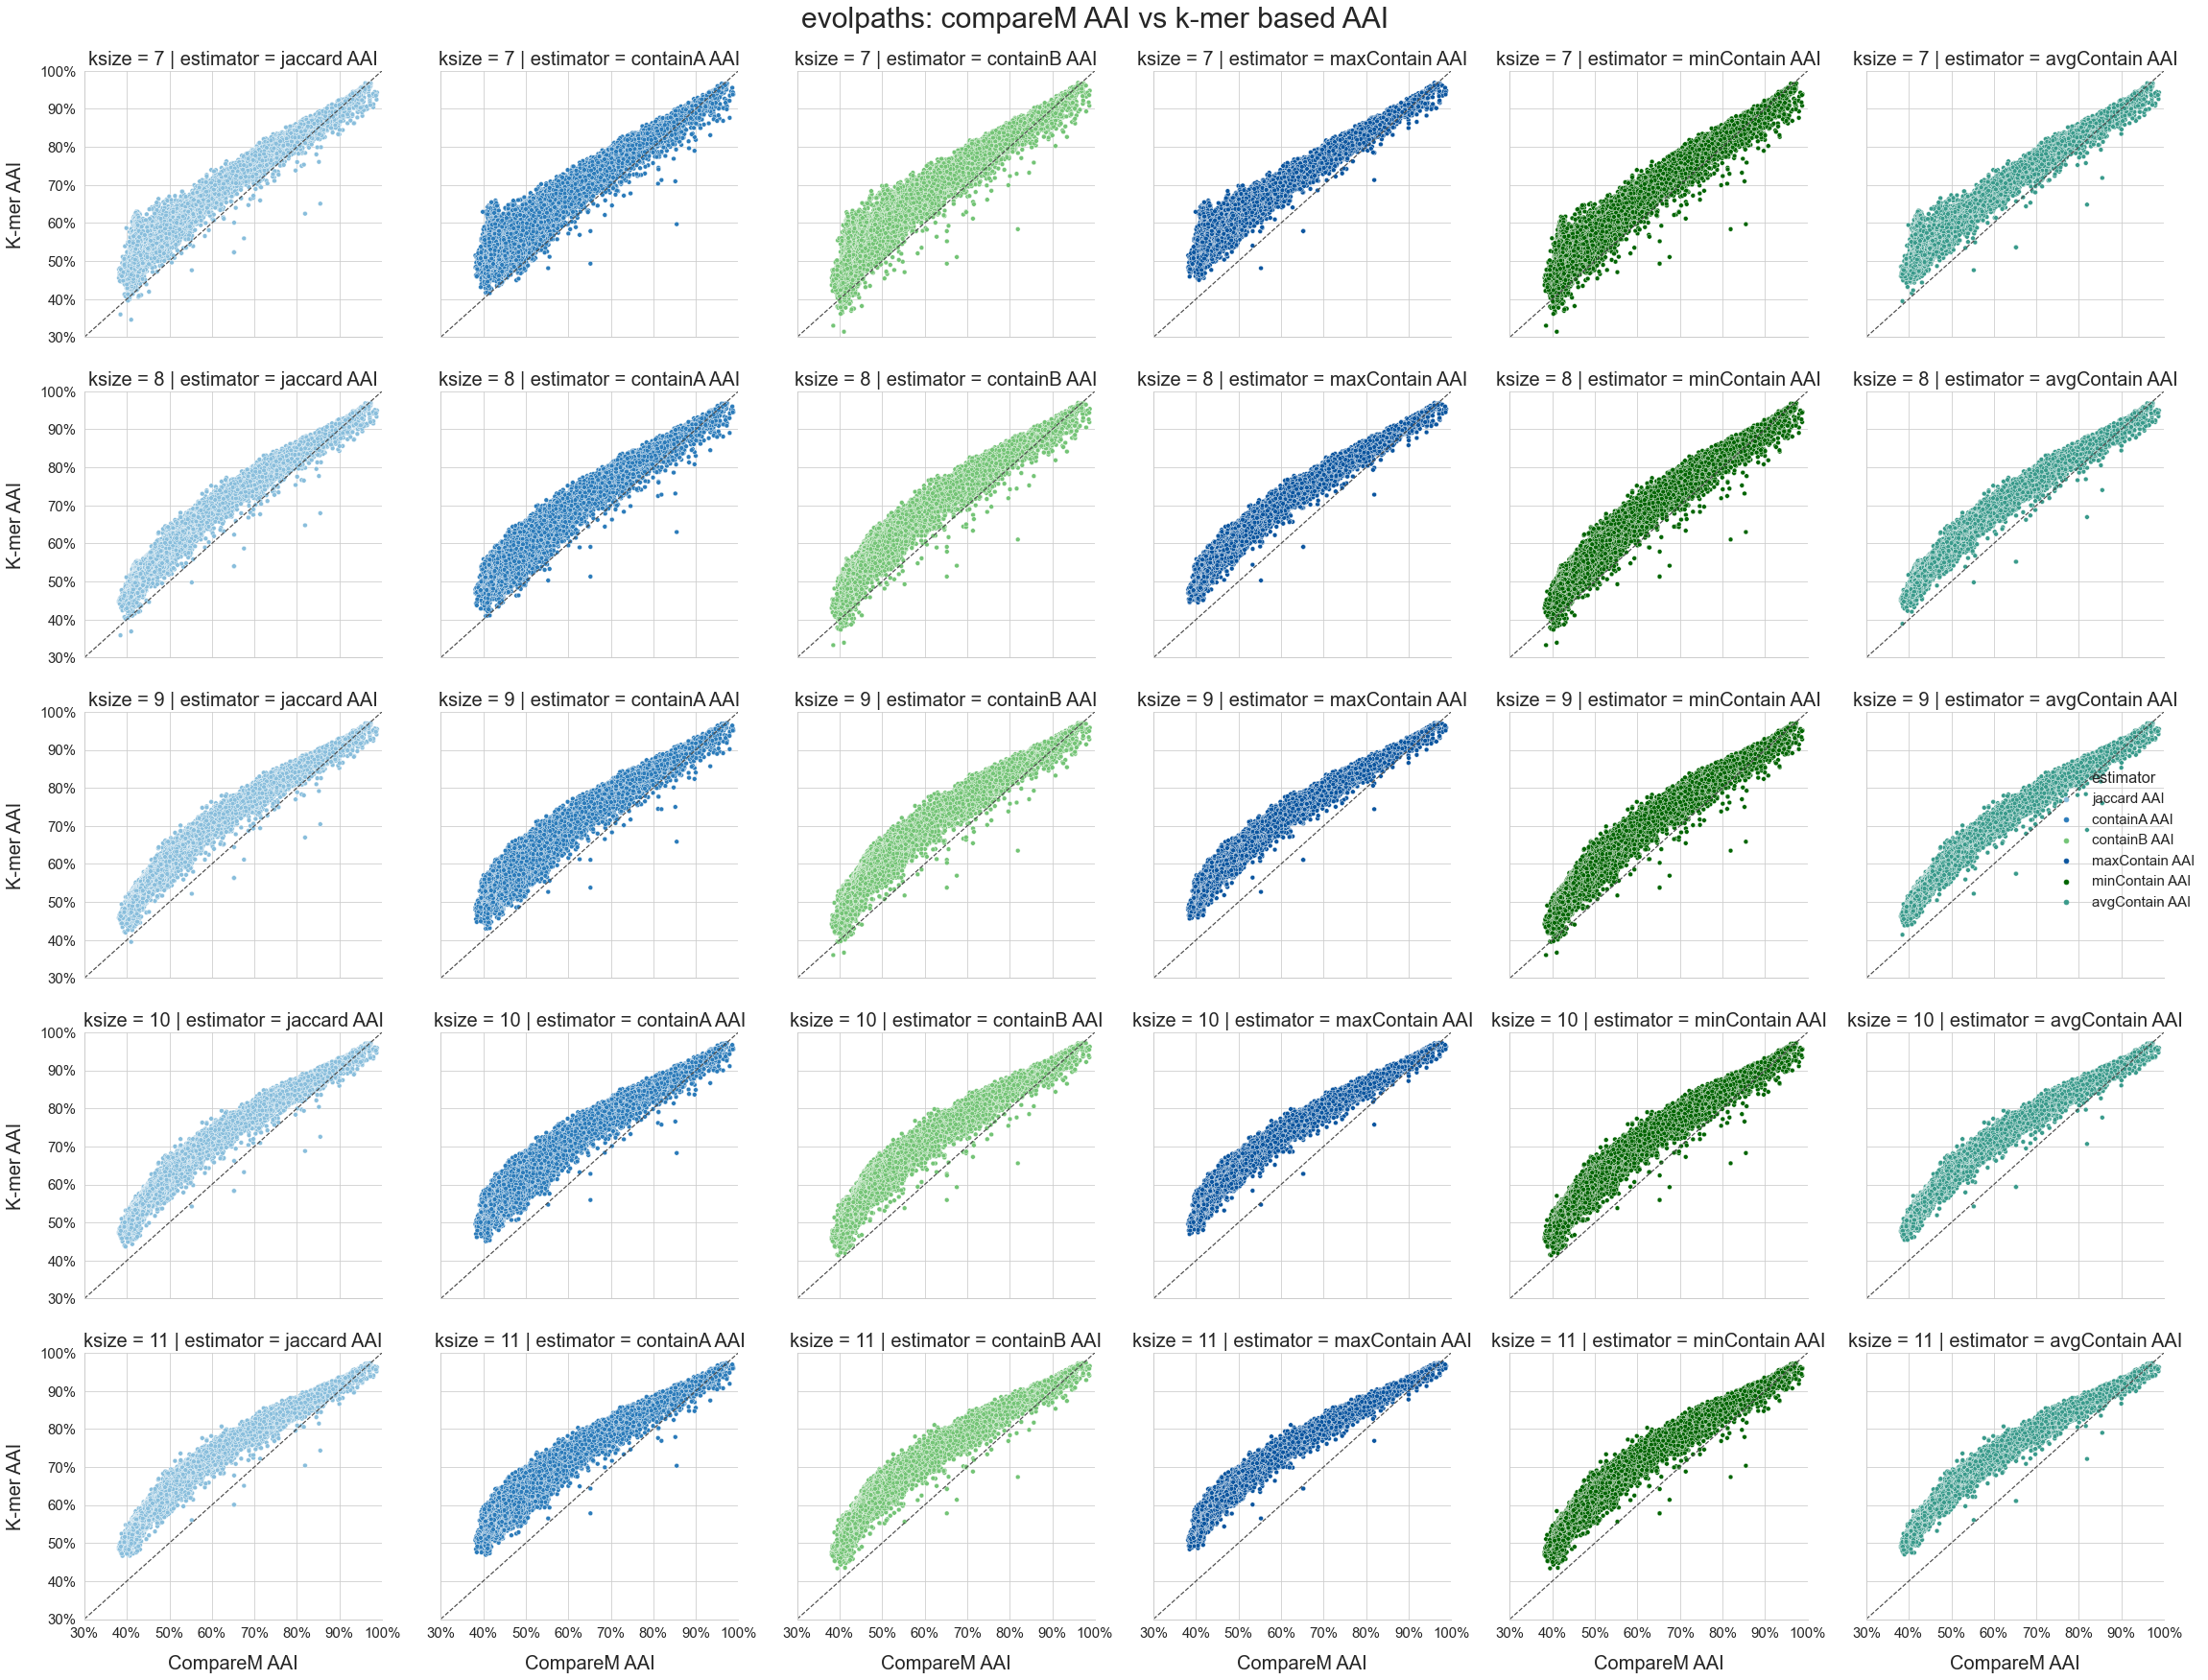

In [23]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=scaled1, 
                  x="compareM AAI", y="AAI", 
                  hue="estimator",col="estimator", 
                  row="ksize", palette=aai_colors)
    
    #plt.gcf().set_size_inches(11, 7)
    xlim=(0.3, 1)
    ylim= (0.3, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    
    g.set_axis_labels("CompareM AAI", "K-mer AAI", size=20, labelpad=15)
    g.fig.suptitle('evolpaths: compareM AAI vs k-mer based AAI')
    g.fig.tight_layout()
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

In [24]:
select_estimator = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
select_kmer = [7,10]

In [25]:
scaled1_select = scaled1[(scaled1["estimator"].isin(select_estimator)) & scaled1["ksize"].isin(select_kmer)]
scaled200_select = scaled200[(scaled200["estimator"].isin(select_estimator)) & scaled200["ksize"].isin(select_kmer)]

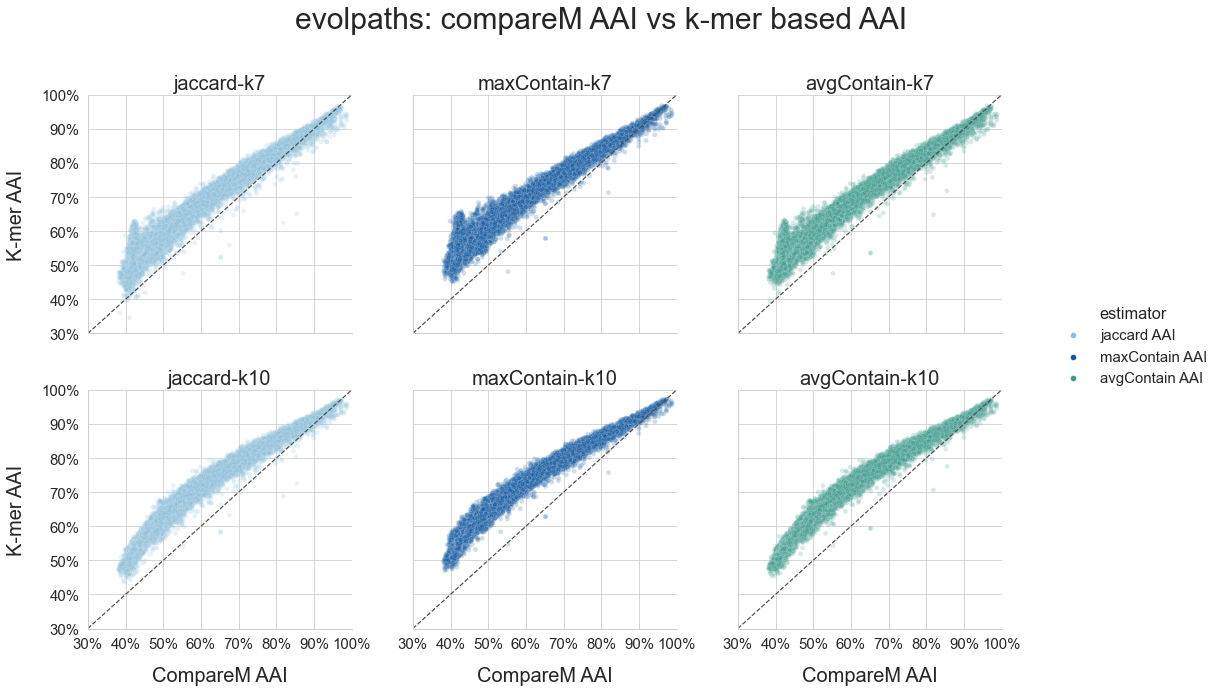

In [26]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=scaled1_select, 
                  x="compareM AAI", y="AAI", 
                  hue="estimator",col="estimator", 
                  row="ksize", palette=aai_colors, alpha=0.2)
    
    #plt.gcf().set_size_inches(11, 7)
    xlim=(0.3, 1)
    ylim= (0.3, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        title = ax.get_title()
        if "jaccard" in title:
            new_title = "jaccard"
        elif "max" in title:
            new_title = "maxContain"
        elif "avg" in title:
            new_title = "avgContain"
        if "7" in title:
            new_title += "-k7"
        else:
            new_title += "-k10"
        #print(title, new_title)
        ax.set_title(new_title)
    g.set_axis_labels("CompareM AAI", "K-mer AAI", size=20, labelpad=15)
    g.fig.suptitle('evolpaths: compareM AAI vs k-mer based AAI')
    g.tight_layout()
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

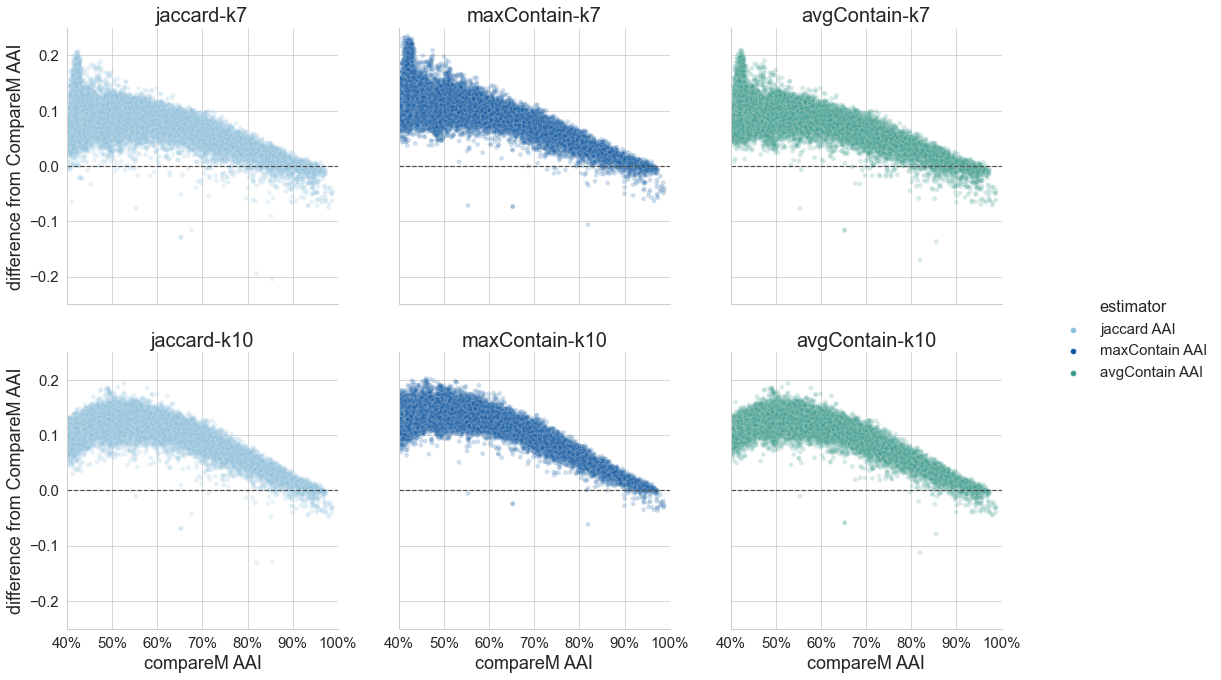

In [27]:
#sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=scaled1_select, x="compareM AAI", y="AAIdiff", hue="estimator",col="estimator",row="ksize", palette=aai_colors, alpha=0.2)
    g.set(xlim=(.4, 1), ylim=(-0.25, 0.25))

    for ax in g.fig.axes:
        ax.axhline(0, ls="--", c=".3")
        ax.set_xlabel("compareM AAI", size=18)
        ax.set_ylabel("difference from CompareM AAI", size=18)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
   #     ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
        #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        title = ax.get_title()
        if "jaccard" in title:
            new_title = "jaccard"
        elif "max" in title:
            new_title = "maxContain"
        elif "avg" in title:
            new_title = "avgContain"
        if "7" in title:
            new_title += "-k7"
        else:
            new_title += "-k10"
        #print(title, new_title)
        ax.set_title(new_title)
    g.tight_layout()

In [28]:
scaled1_k10 = scaled1_select[scaled1_select['ksize'] == 10]
scaled1_k7 = scaled1_select[scaled1_select['ksize'] == 7]
scaled200_k10 = scaled200_select[scaled200_select['ksize'] == 10]
scaled200_k7 = scaled200_select[scaled200_select['ksize'] == 7]

In [29]:
scaled1_k10.tail()

comparison_name     path lowest_common_rank  \
2211267  GCA_002409405.1_x_GCA_001899145.1  path999             family   
2211270  GCA_002409405.1_x_GCA_013042625.1  path999              order   
2211273  GCA_002409405.1_x_GCA_002317435.1  path999              class   
2211276  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
2211279  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

             anchor_name     compare_name alpha-ksize alphabet  ksize  scaled  \
2211267  GCA_002409405.1  GCA_001899145.1  protein-10  protein     10       1   
2211270  GCA_002409405.1  GCA_013042625.1  protein-10  protein     10       1   
2211273  GCA_002409405.1  GCA_002317435.1  protein-10  protein     10       1   
2211276  GCA_002409405.1  GCA_003567135.1  protein-10  protein     10       1   
2211279  GCA_002409405.1  GCF_004319585.1  protein-10  protein     10       1   

         compareM AAI       estimator       AAI   AAIdiff  
2211267        0.5983  avgContain AAI  0.746212  0.147912  
2211270        0.5172  avgContain AAI  0.649216  0.132016  
2211273        0.4829  avgContain AAI  0.589961  0.107061  
2211276        0.4496  avgContain AAI  0.574107  0.124507  
2211279        0.4195  avgContain AAI  0.533321  0.113821

## k10, scaled 1

Text(0.5, 1.0, 'Similarity of AAI estimation approaches to CompareM AAI')

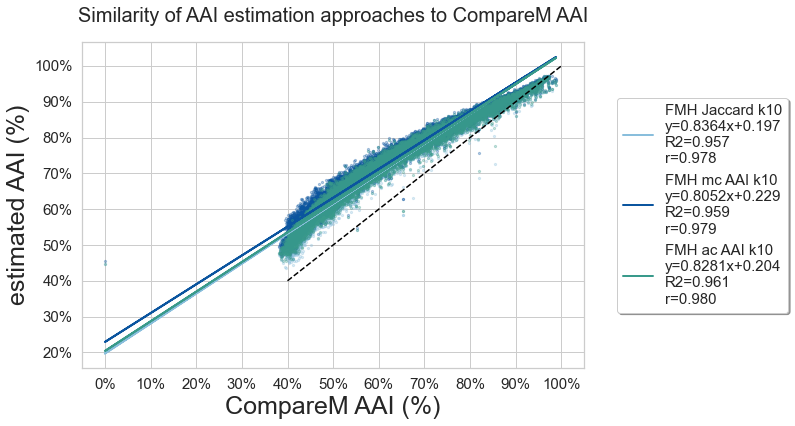

In [30]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k10", "maxContain AAI": "FMH mc AAI k10", "avgContain AAI": "FMH ac AAI k10"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "compareM AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled1_k10[scaled1_k10['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("CompareM AAI (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of AAI estimation approaches to CompareM AAI", pad=20, size=20)



## k7, scaled 1

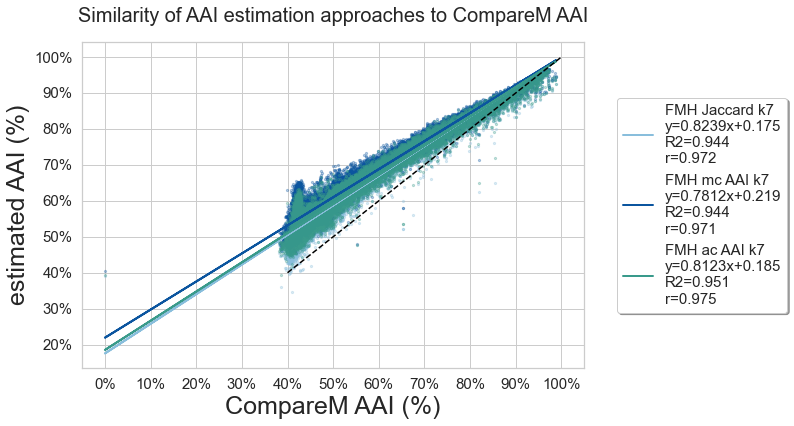

In [31]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k7", "maxContain AAI": "FMH mc AAI k7", "avgContain AAI": "FMH ac AAI k7"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "compareM AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled1_k7[scaled1_k7['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("CompareM AAI (%)", size=25)
#plt.legend(loc = 'best')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to CompareM AAI", pad=20, size=20)

fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled1.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled1.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

## scaled 200, k7

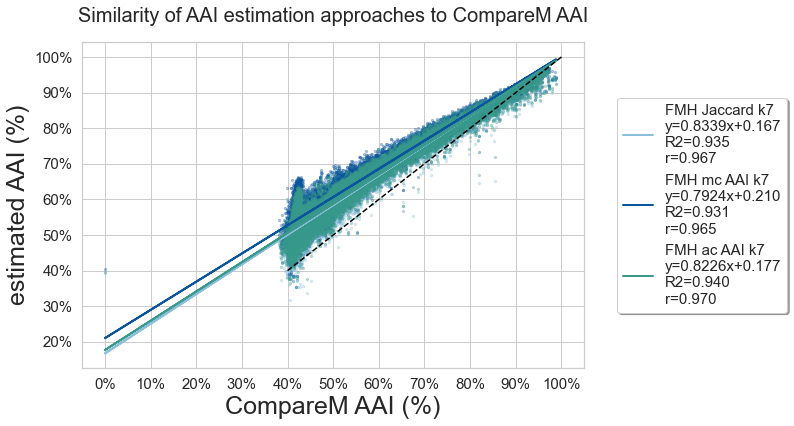

In [32]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k7", "maxContain AAI": "FMH mc AAI k7", "avgContain AAI": "FMH ac AAI k7"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "compareM AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled200_k7[scaled200_k7['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("CompareM AAI (%)", size=25)
#plt.legend(loc = 'best')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to CompareM AAI", pad=20, size=20)

fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled200.k7.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled200.k7.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# drop max Contain

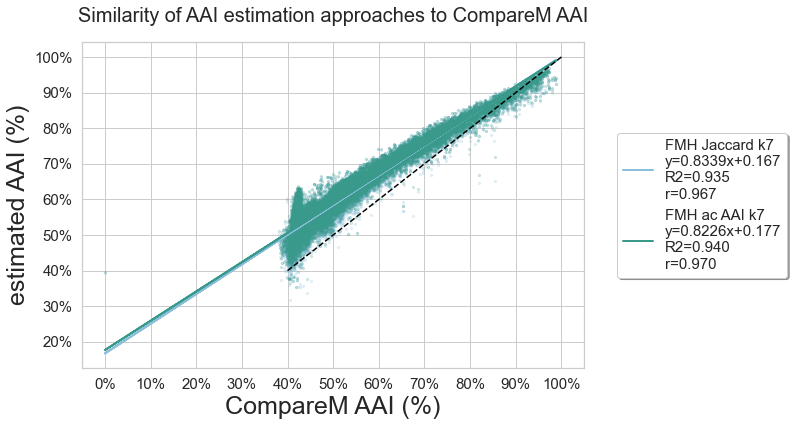

In [33]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "avgContain AAI"]#, "maxContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k7", "maxContain AAI": "FMH mc AAI k7", "avgContain AAI": "FMH ac AAI k7"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "compareM AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled200_k7[scaled200_k7['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("CompareM AAI (%)", size=25)
#plt.legend(loc = 'best')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to CompareM AAI", pad=20, size=20)

fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled200.k7.jac.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled200.k7.jac.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

## Using EzAAIm as Reference Value

In [52]:
eM_compare_id_vars = ["comparison_name", "path", 
                   "lowest_common_rank", "anchor_name", 
                   "compare_name", "alpha-ksize", 
                   "alphabet", "ksize","scaled", 
                   #"fastani ANI", "ANIm ident", 
                    #"ANIb ident", "ANIb_coverage",
                   "EzAAIm AAI"]

eM_prot_value_vars = ["jaccard AAI", "containA AAI", 
                   "containB AAI", "maxContain AAI", 
                   "minContain AAI", "avgContain AAI",
                   "compareM AAI"]

In [57]:
eM_melted=pd.melt(ep,id_vars= eM_compare_id_vars,
                     value_vars=eM_prot_value_vars,
                     var_name='estimator', value_name='AAI')
eM_melted["AAIdiff"] = eM_melted["AAI"] - eM_melted['EzAAIm AAI']
eM_melted

comparison_name     path lowest_common_rank  \
0        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
1        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
3        GCA_004524385.1_x_GCA_011364975.1    path1             family   
4        GCA_004524385.1_x_GCA_011364975.1    path1             family   
...                                    ...      ...                ...   
2579845  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
2579846  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
2579847  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
2579848  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
2579849  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

             anchor_name     compare_name alpha-ksize alphabet  ksize  scaled  \
0        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7       1   
1        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     100   
2        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     200   
3        GCA_004524385.1  GCA_011364975.1   protein-7  protein      7       1   
4        GCA_004524385.1  GCA_011364975.1   protein-7  protein      7     100   
...                  ...              ...         ...      ...    ...     ...   
2579845  GCA_002409405.1  GCA_003567135.1  protein-11  protein     11     100   
2579846  GCA_002409405.1  GCA_003567135.1  protein-11  protein     11     200   
2579847  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11       1   
2579848  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11     100   
2579849  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11     200   

         EzAAIm AAI     estimator       AAI   AAIdiff  
0          0.929069   jaccard AAI  0.878781 -0.050288  
1          0.929069   jaccard AAI  0.880078 -0.048991  
2          0.929069   jaccard AAI  0.879724 -0.049345  
3          0.631682   jaccard AAI  0.658210  0.026528  
4          0.631682   jaccard AAI  0.659027  0.027345  
...             ...           ...       ...       ...  
2579845    0.507298  compareM AAI  0.449600 -0.057698  
2579846    0.507298  compareM AAI  0.449600 -0.057698  
2579847    0.485674  compareM AAI  0.419500 -0.066174  
2579848    0.485674  compareM AAI  0.419500 -0.066174  
2579849    0.485674  compareM AAI  0.419500 -0.066174  

[2579850 rows x 13 columns]

In [58]:
eM_scaled200 = eM_melted[eM_melted["scaled"] == 200]
eM_scaled1 = eM_melted[eM_melted["scaled"] == 1]

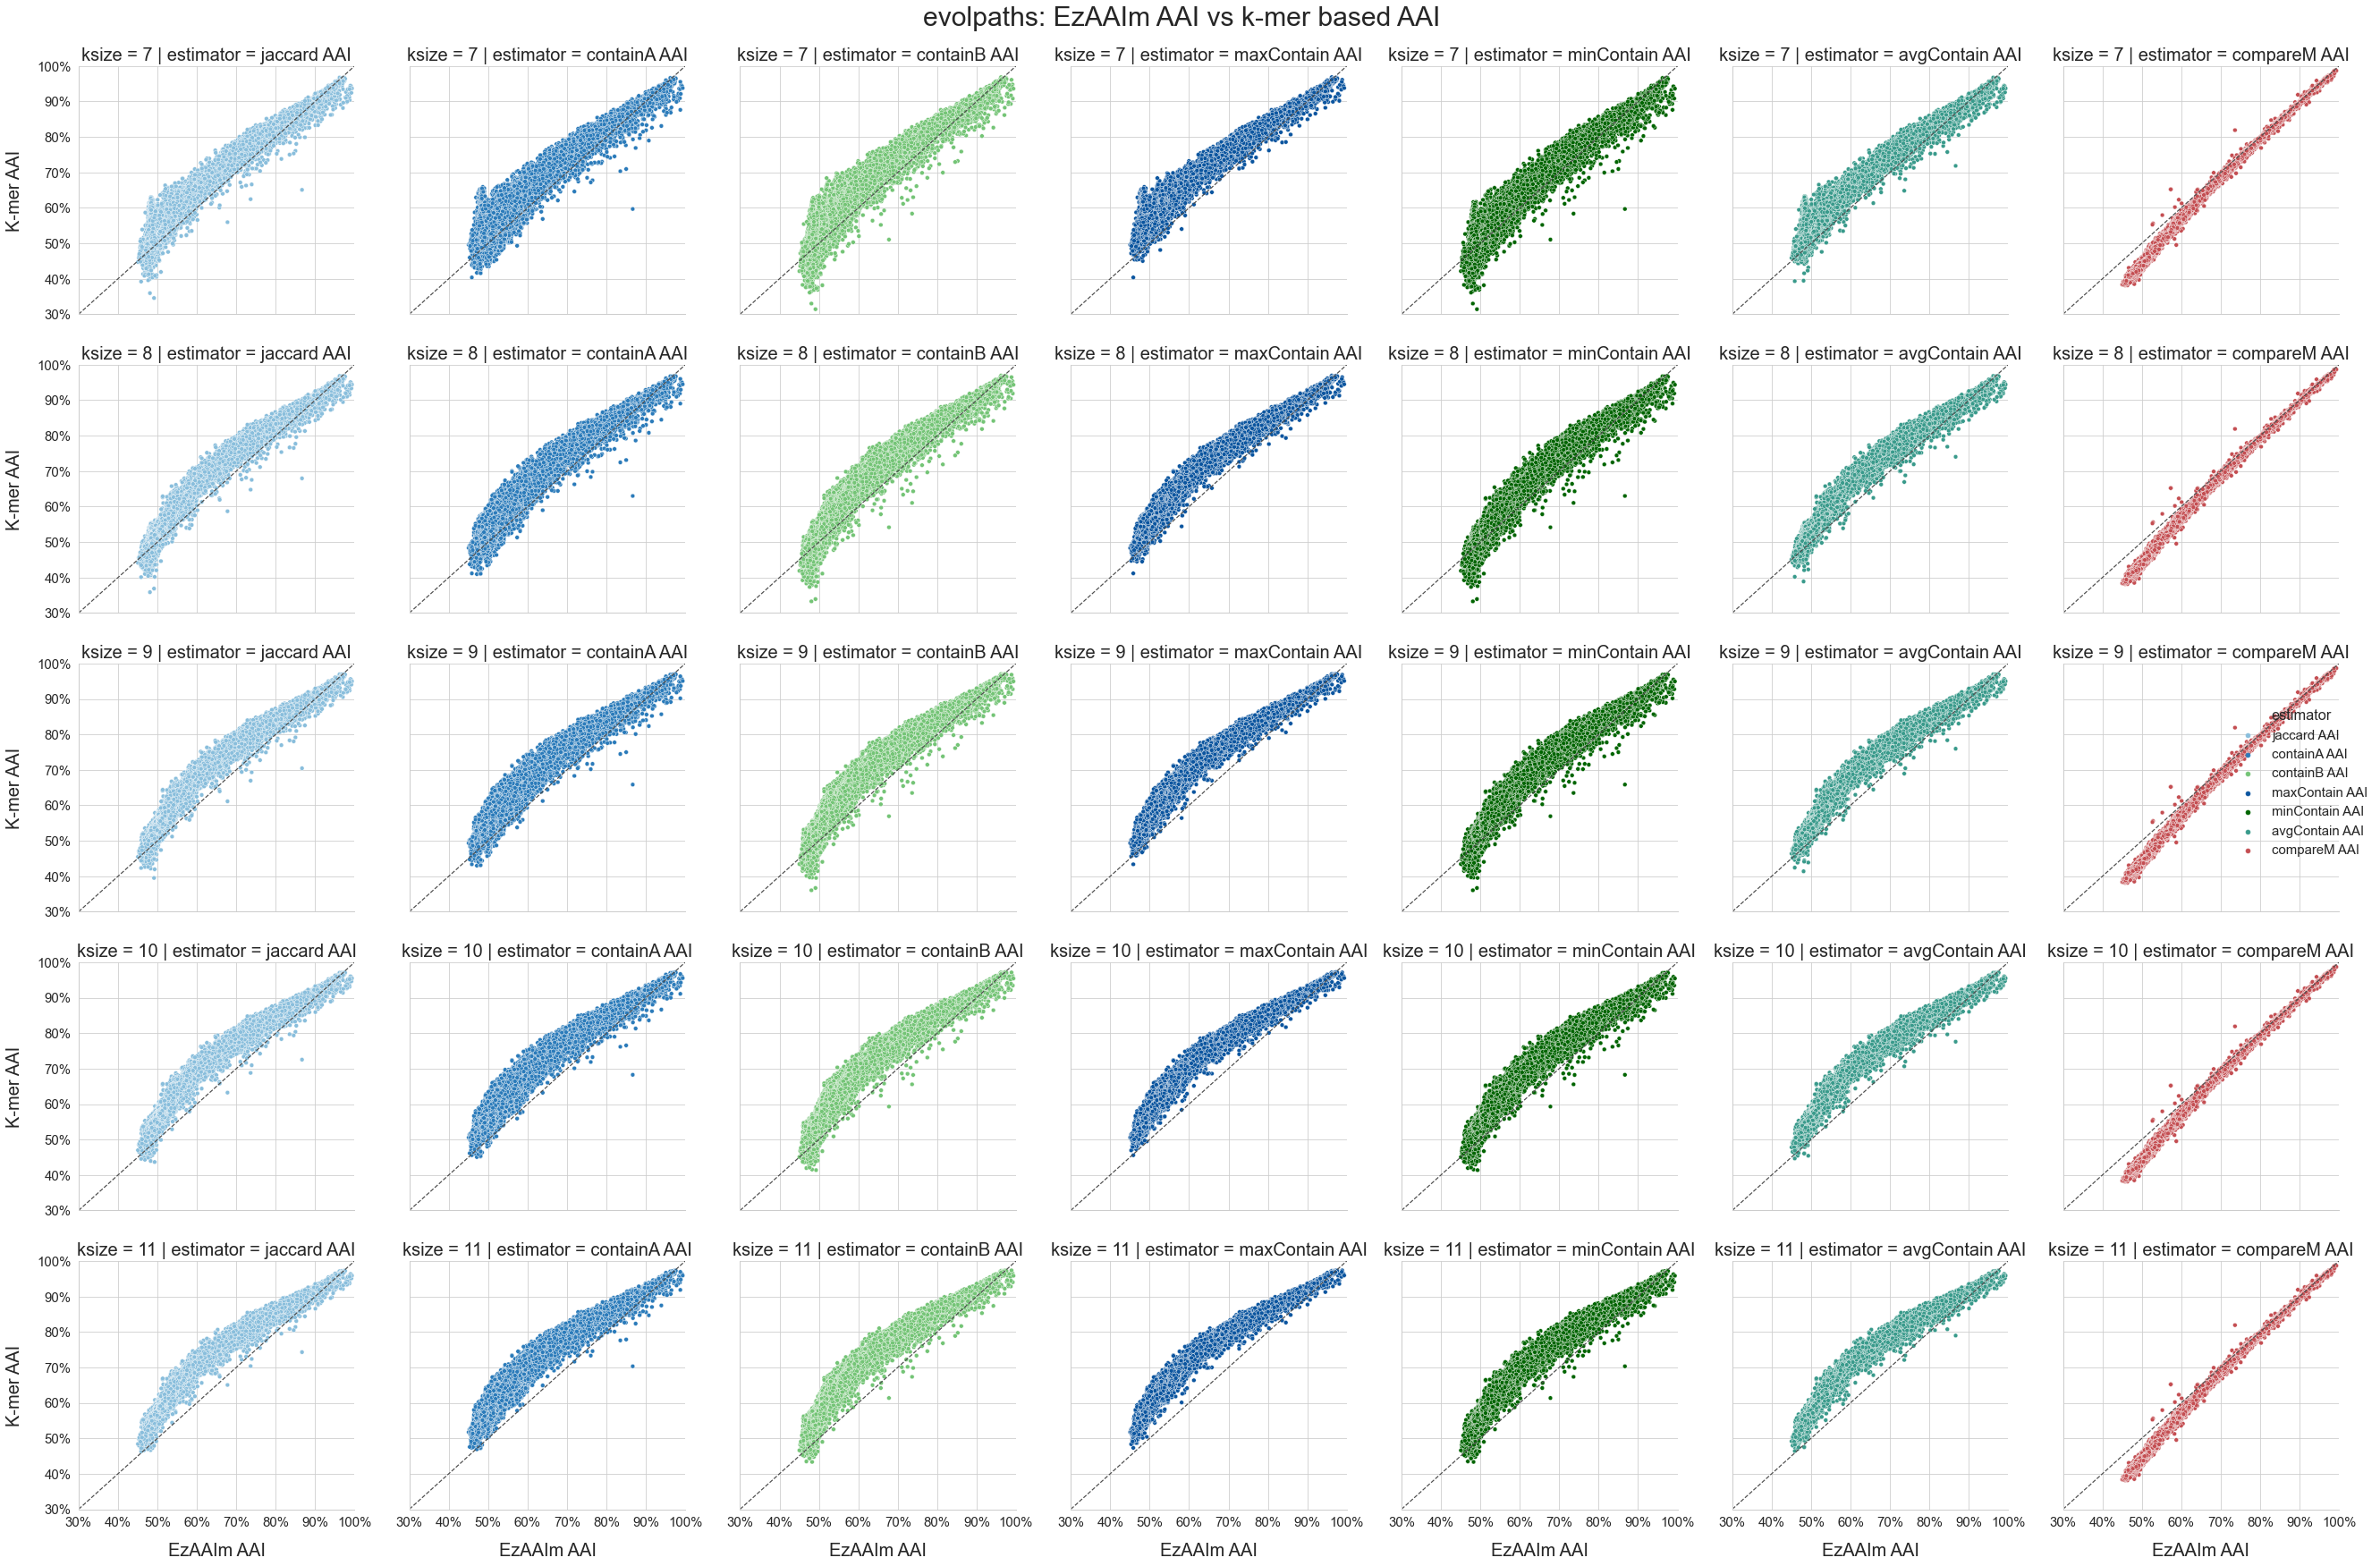

In [59]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=eM_scaled1, 
                  x="EzAAIm AAI", y="AAI", 
                  hue="estimator",col="estimator", 
                  row="ksize", palette=aai_colors)
    
    #plt.gcf().set_size_inches(11, 7)
    xlim=(0.3, 1)
    ylim= (0.3, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    
    g.set_axis_labels("EzAAIm AAI", "K-mer AAI", size=20, labelpad=15)
    g.fig.suptitle('evolpaths: EzAAIm AAI vs k-mer based AAI')
    g.fig.tight_layout()
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

In [60]:
select_estimator = ["avgContain AAI", "maxContain AAI", "compareM AAI"]
select_kmer = [7,10]

In [61]:
eM_scaled1_select = eM_scaled1[(eM_scaled1["estimator"].isin(select_estimator)) & eM_scaled1["ksize"].isin(select_kmer)]
eM_scaled200_select = eM_scaled200[(eM_scaled200["estimator"].isin(select_estimator)) & eM_scaled200["ksize"].isin(select_kmer)]

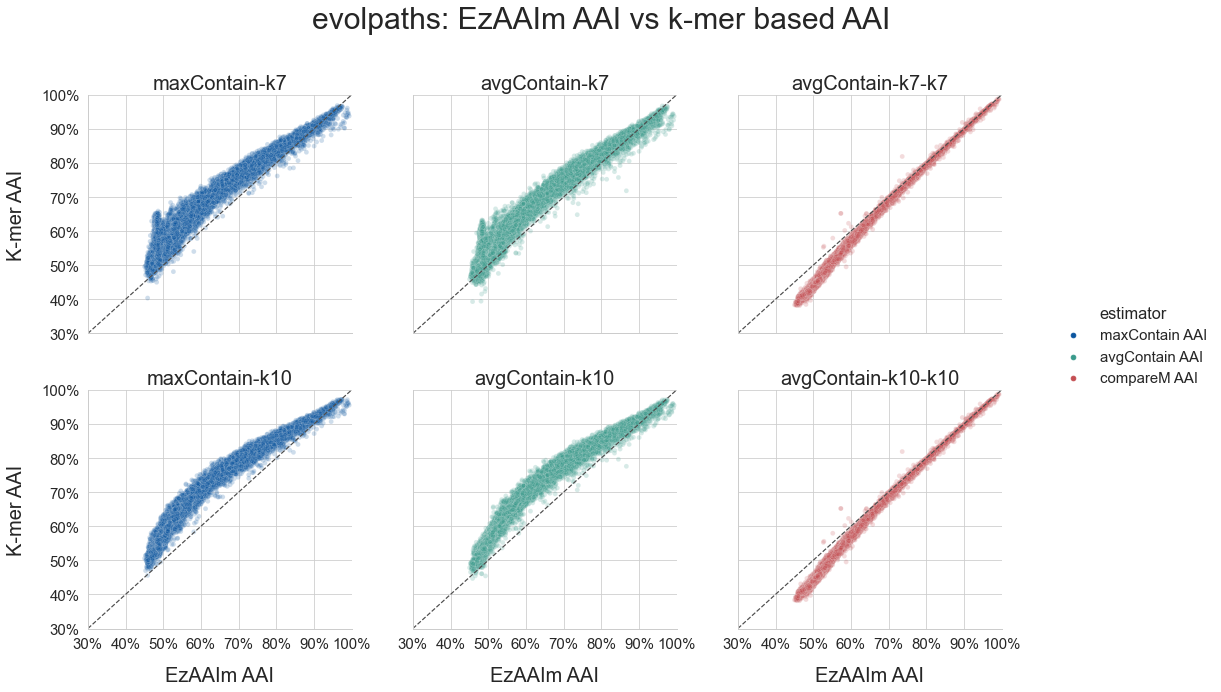

In [62]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=eM_scaled1_select, 
                  x="EzAAIm AAI", y="AAI", 
                  hue="estimator",col="estimator", 
                  row="ksize", palette=aai_colors, alpha=0.2)
    
    #plt.gcf().set_size_inches(11, 7)
    xlim=(0.3, 1)
    ylim= (0.3, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        title = ax.get_title()
        if "jaccard" in title:
            new_title = "jaccard"
        elif "max" in title:
            new_title = "maxContain"
        elif "avg" in title:
            new_title = "avgContain"
        if "7" in title:
            new_title += "-k7"
        else:
            new_title += "-k10"
        #print(title, new_title)
        ax.set_title(new_title)
    g.set_axis_labels("EzAAIm AAI", "K-mer AAI", size=20, labelpad=15)
    g.fig.suptitle('evolpaths: EzAAIm AAI vs k-mer based AAI')
    g.tight_layout()
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

In [63]:
eM_scaled1_k10 = eM_scaled1_select[eM_scaled1_select['ksize'] == 10]
eM_scaled1_k7 = eM_scaled1_select[eM_scaled1_select['ksize'] == 7]
eM_scaled200_k10 = eM_scaled200_select[eM_scaled200_select['ksize'] == 10]
eM_scaled200_k7 = eM_scaled200_select[eM_scaled200_select['ksize'] == 7]

## EzAAIm k7 scaled 1

In [64]:
eM_scaled1_k7["estimator"].unique()

array(['maxContain AAI', 'avgContain AAI', 'compareM AAI'], dtype=object)

In [65]:
eM_scaled1_k7[eM_scaled1_k7["estimator"] == "compareM AAI"]

comparison_name     path lowest_common_rank  \
2211300  GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2211303  GCA_004524385.1_x_GCA_011364975.1    path1             family   
2211306  GCA_004524385.1_x_GCF_008000775.1    path1              order   
2211309  GCA_004524385.1_x_GCA_013375405.1    path1              class   
2211312  GCA_004524385.1_x_GCA_004524565.1    path1             phylum   
...                                    ...      ...                ...   
2579763  GCA_002409405.1_x_GCA_001899145.1  path999             family   
2579766  GCA_002409405.1_x_GCA_013042625.1  path999              order   
2579769  GCA_002409405.1_x_GCA_002317435.1  path999              class   
2579772  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
2579775  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

             anchor_name     compare_name alpha-ksize alphabet  ksize  scaled  \
2211300  GCA_004524385.1  GCA_004524535.1   protein-7  protein      7       1   
2211303  GCA_004524385.1  GCA_011364975.1   protein-7  protein      7       1   
2211306  GCA_004524385.1  GCF_008000775.1   protein-7  protein      7       1   
2211309  GCA_004524385.1  GCA_013375405.1   protein-7  protein      7       1   
2211312  GCA_004524385.1  GCA_004524565.1   protein-7  protein      7       1   
...                  ...              ...         ...      ...    ...     ...   
2579763  GCA_002409405.1  GCA_001899145.1   protein-7  protein      7       1   
2579766  GCA_002409405.1  GCA_013042625.1   protein-7  protein      7       1   
2579769  GCA_002409405.1  GCA_002317435.1   protein-7  protein      7       1   
2579772  GCA_002409405.1  GCA_003567135.1   protein-7  protein      7       1   
2579775  GCA_002409405.1  GCF_004319585.1   protein-7  protein      7       1   

         EzAAIm AAI     estimator     AAI   AAIdiff  
2211300    0.929069  compareM AAI  0.9242 -0.004869  
2211303    0.631682  compareM AAI  0.6116 -0.020082  
2211306    0.510600  compareM AAI  0.4561 -0.054500  
2211309    0.517303  compareM AAI  0.4572 -0.060103  
2211312    0.480559  compareM AAI  0.4077 -0.072859  
...             ...           ...     ...       ...  
2579763    0.630800  compareM AAI  0.5983 -0.032500  
2579766    0.566472  compareM AAI  0.5172 -0.049272  
2579769    0.543715  compareM AAI  0.4829 -0.060815  
2579772    0.507298  compareM AAI  0.4496 -0.057698  
2579775    0.485674  compareM AAI  0.4195 -0.066174  

[24570 rows x 13 columns]

Text(0.5, 1.0, 'Similarity of AAI estimation approaches to EzAAIm AAI')

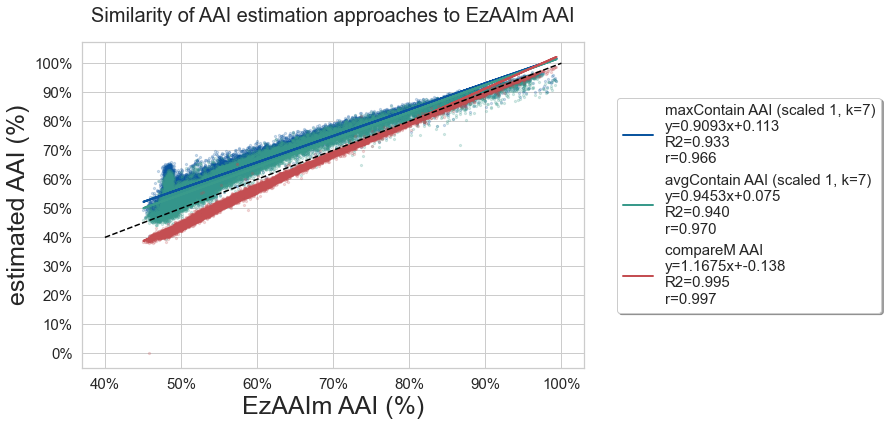

In [66]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["maxContain AAI", "avgContain AAI", "compareM AAI"]#, "maxContain AAI"]
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI (scaled 1, k=7)", "avgContain AAI": "avgContain AAI (scaled 1, k=7)", "compareM AAI": "compareM AAI"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "EzAAIm AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = eM_scaled1_k7.drop(columns= ["AAIdiff"])
    df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("EzAAIm AAI (%)", size=25)
#plt.legend(loc = 'best')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to EzAAIm AAI", pad=20, size=20)

#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIm.scaled200.k7.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIm.scaled200.k7.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

Text(0.5, 1.0, 'Similarity of AAI estimation approaches to EzAAIm AAI')

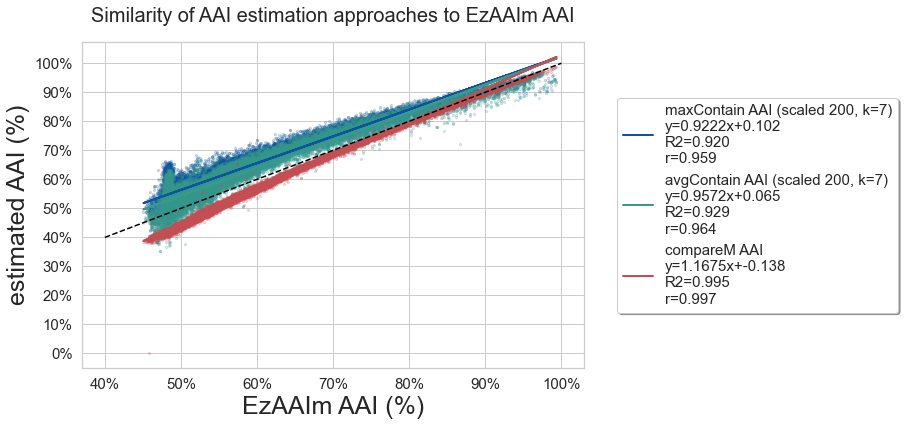

In [67]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["maxContain AAI", "avgContain AAI", "compareM AAI"]#, "maxContain AAI"]
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI (scaled 200, k=7)", "avgContain AAI": "avgContain AAI (scaled 200, k=7)", "compareM AAI": "compareM AAI"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "EzAAIm AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = eM_scaled200_k7.drop(columns= ["AAIdiff"])
    df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("EzAAIm AAI (%)", size=25)
#plt.legend(loc = 'best')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to EzAAIm AAI", pad=20, size=20)

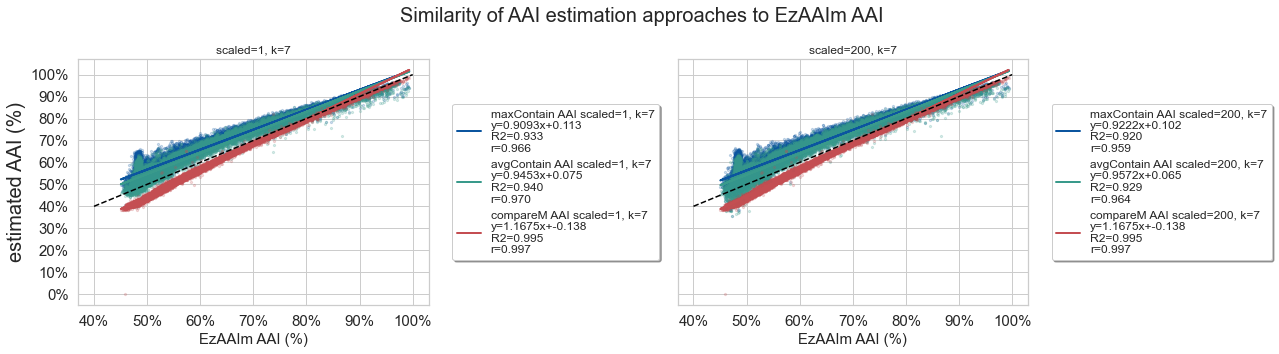

In [68]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["maxContain AAI", "avgContain AAI", "compareM AAI"]#, "maxContain AAI"]
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(18,5))
dfs = [eM_scaled1_k7,eM_scaled200_k7]
param_labels = ["scaled=1, k=7","scaled=200, k=7"]
#fig = plt.figure(figsize=(9,6))
#ax = fig.add_subplot(111)
for n, ax in enumerate([ax1,ax2]):
    df = dfs[n]
    df = df.drop(columns= ["AAIdiff"])
    for var in vars_of_interest:
        x_col = "EzAAIm AAI"
        y_col = "AAI"
        color = aai_colors[var]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        ax.set_title(param_labels[n])
        ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":12})
    
    xlim=(0.4, 1)#None
    ylim= (0.4, 1)
    #ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
    ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    ax.tick_params(axis='x', labelsize= 15)
    ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
    if n == 0:
        ax.set_ylabel("estimated AAI (%)", size=20)
    ax.set_xlabel("EzAAIm AAI (%)", size=15)
    #plt.legend(loc = 'best')
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title("Similarity of AAI estimation approaches to EzAAIm AAI", pad=20, size=20)
fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()

# diff scaled vals on same plot

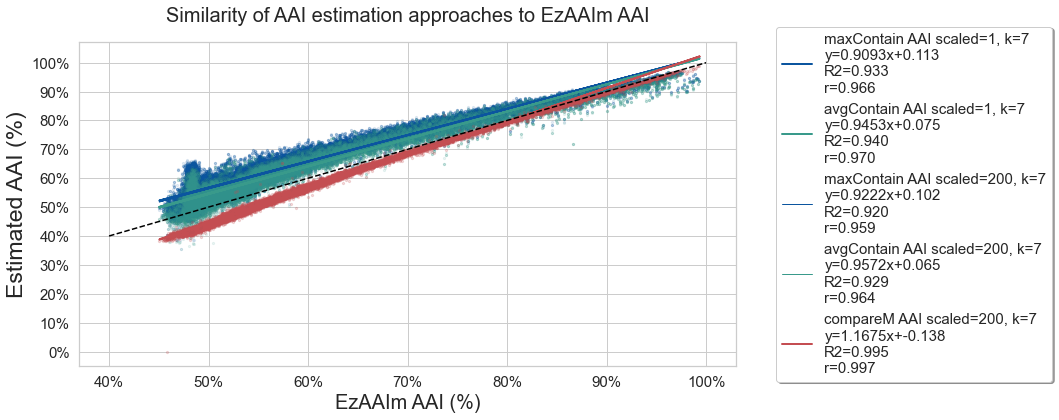

In [69]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["maxContain AAI", "avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)


dfs = [eM_scaled1_k7,eM_scaled200_k7]
param_labels = ["scaled=1, k=7","scaled=200, k=7"]
alphaD = [0.3, 0.1]
linewidthD = [2, 1]

for n, df in enumerate(dfs):
    df = dfs[n]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIm AAI"
        y_col = "AAI"
        color = aai_colors[var]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=linewidthD[n])

for var in mapping_vars:
    x_col = "EzAAIm AAI"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var] + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("Estimated AAI (%)", size=23)
ax.set_xlabel("EzAAIm AAI (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to EzAAIm AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()

## diff scaled values same plot, only avgContain

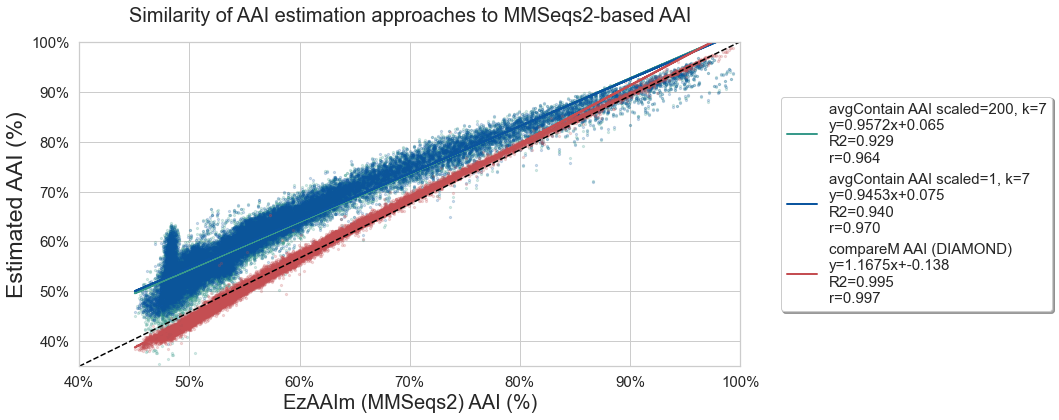

In [110]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

colorD = ["#399a8b","#0b559f"]

dfs = [eM_scaled200_k7,eM_scaled1_k7]
param_labels = ["scaled=200, k=7","scaled=1, k=7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, df in enumerate(dfs):
    df = dfs[n]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIm AAI"
        y_col = "AAI"
        #color = aai_colors[var]
        color = colorD[n]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIm AAI"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.4, 1)#None
ylim= (0.35, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("Estimated AAI (%)", size=23)
ax.set_xlabel("EzAAIm (MMSeqs2) AAI (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to MMSeqs2-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIm.k7.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIm.k7.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

## Using EzAAIb as Reference Value

In [74]:
eB_compare_id_vars = ["comparison_name", "path", 
                   "lowest_common_rank", "anchor_name", 
                   "compare_name", "alpha-ksize", 
                   "alphabet", "ksize","scaled", 
                   #"fastani ANI", "ANIm ident", 
                    #"ANIb ident", "ANIb_coverage",
                   "EzAAIb AAI"]

eB_prot_value_vars = ["jaccard AAI", "containA AAI", 
                   "containB AAI", "maxContain AAI", 
                   "minContain AAI", "avgContain AAI",
                   "compareM AAI", "EzAAIm AAI"]

In [76]:
eB_melted=pd.melt(ep,id_vars= eB_compare_id_vars,
                     value_vars=eB_prot_value_vars,
                     var_name='estimator', value_name='AAI')
eB_melted["AAIdiff"] = eB_melted["AAI"] - eB_melted['EzAAIb AAI']
eB_melted

comparison_name     path lowest_common_rank  \
0        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
1        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
3        GCA_004524385.1_x_GCA_011364975.1    path1             family   
4        GCA_004524385.1_x_GCA_011364975.1    path1             family   
...                                    ...      ...                ...   
2948395  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
2948396  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
2948397  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
2948398  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
2948399  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

             anchor_name     compare_name alpha-ksize alphabet  ksize  scaled  \
0        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7       1   
1        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     100   
2        GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     200   
3        GCA_004524385.1  GCA_011364975.1   protein-7  protein      7       1   
4        GCA_004524385.1  GCA_011364975.1   protein-7  protein      7     100   
...                  ...              ...         ...      ...    ...     ...   
2948395  GCA_002409405.1  GCA_003567135.1  protein-11  protein     11     100   
2948396  GCA_002409405.1  GCA_003567135.1  protein-11  protein     11     200   
2948397  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11       1   
2948398  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11     100   
2948399  GCA_002409405.1  GCF_004319585.1  protein-11  protein     11     200   

         EzAAIb AAI    estimator       AAI   AAIdiff  
0          0.929249  jaccard AAI  0.878781 -0.050468  
1          0.929249  jaccard AAI  0.880078 -0.049171  
2          0.929249  jaccard AAI  0.879724 -0.049525  
3          0.634232  jaccard AAI  0.658210  0.023978  
4          0.634232  jaccard AAI  0.659027  0.024795  
...             ...          ...       ...       ...  
2948395    0.507907   EzAAIm AAI  0.507298 -0.000610  
2948396    0.507907   EzAAIm AAI  0.507298 -0.000610  
2948397    0.484488   EzAAIm AAI  0.485674  0.001186  
2948398    0.484488   EzAAIm AAI  0.485674  0.001186  
2948399    0.484488   EzAAIm AAI  0.485674  0.001186  

[2948400 rows x 13 columns]

In [77]:
eB_scaled200 = eB_melted[eB_melted["scaled"] == 200]
eB_scaled1 = eB_melted[eB_melted["scaled"] == 1]

In [81]:
aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "ezAAIb AAI": "#4E0707"}

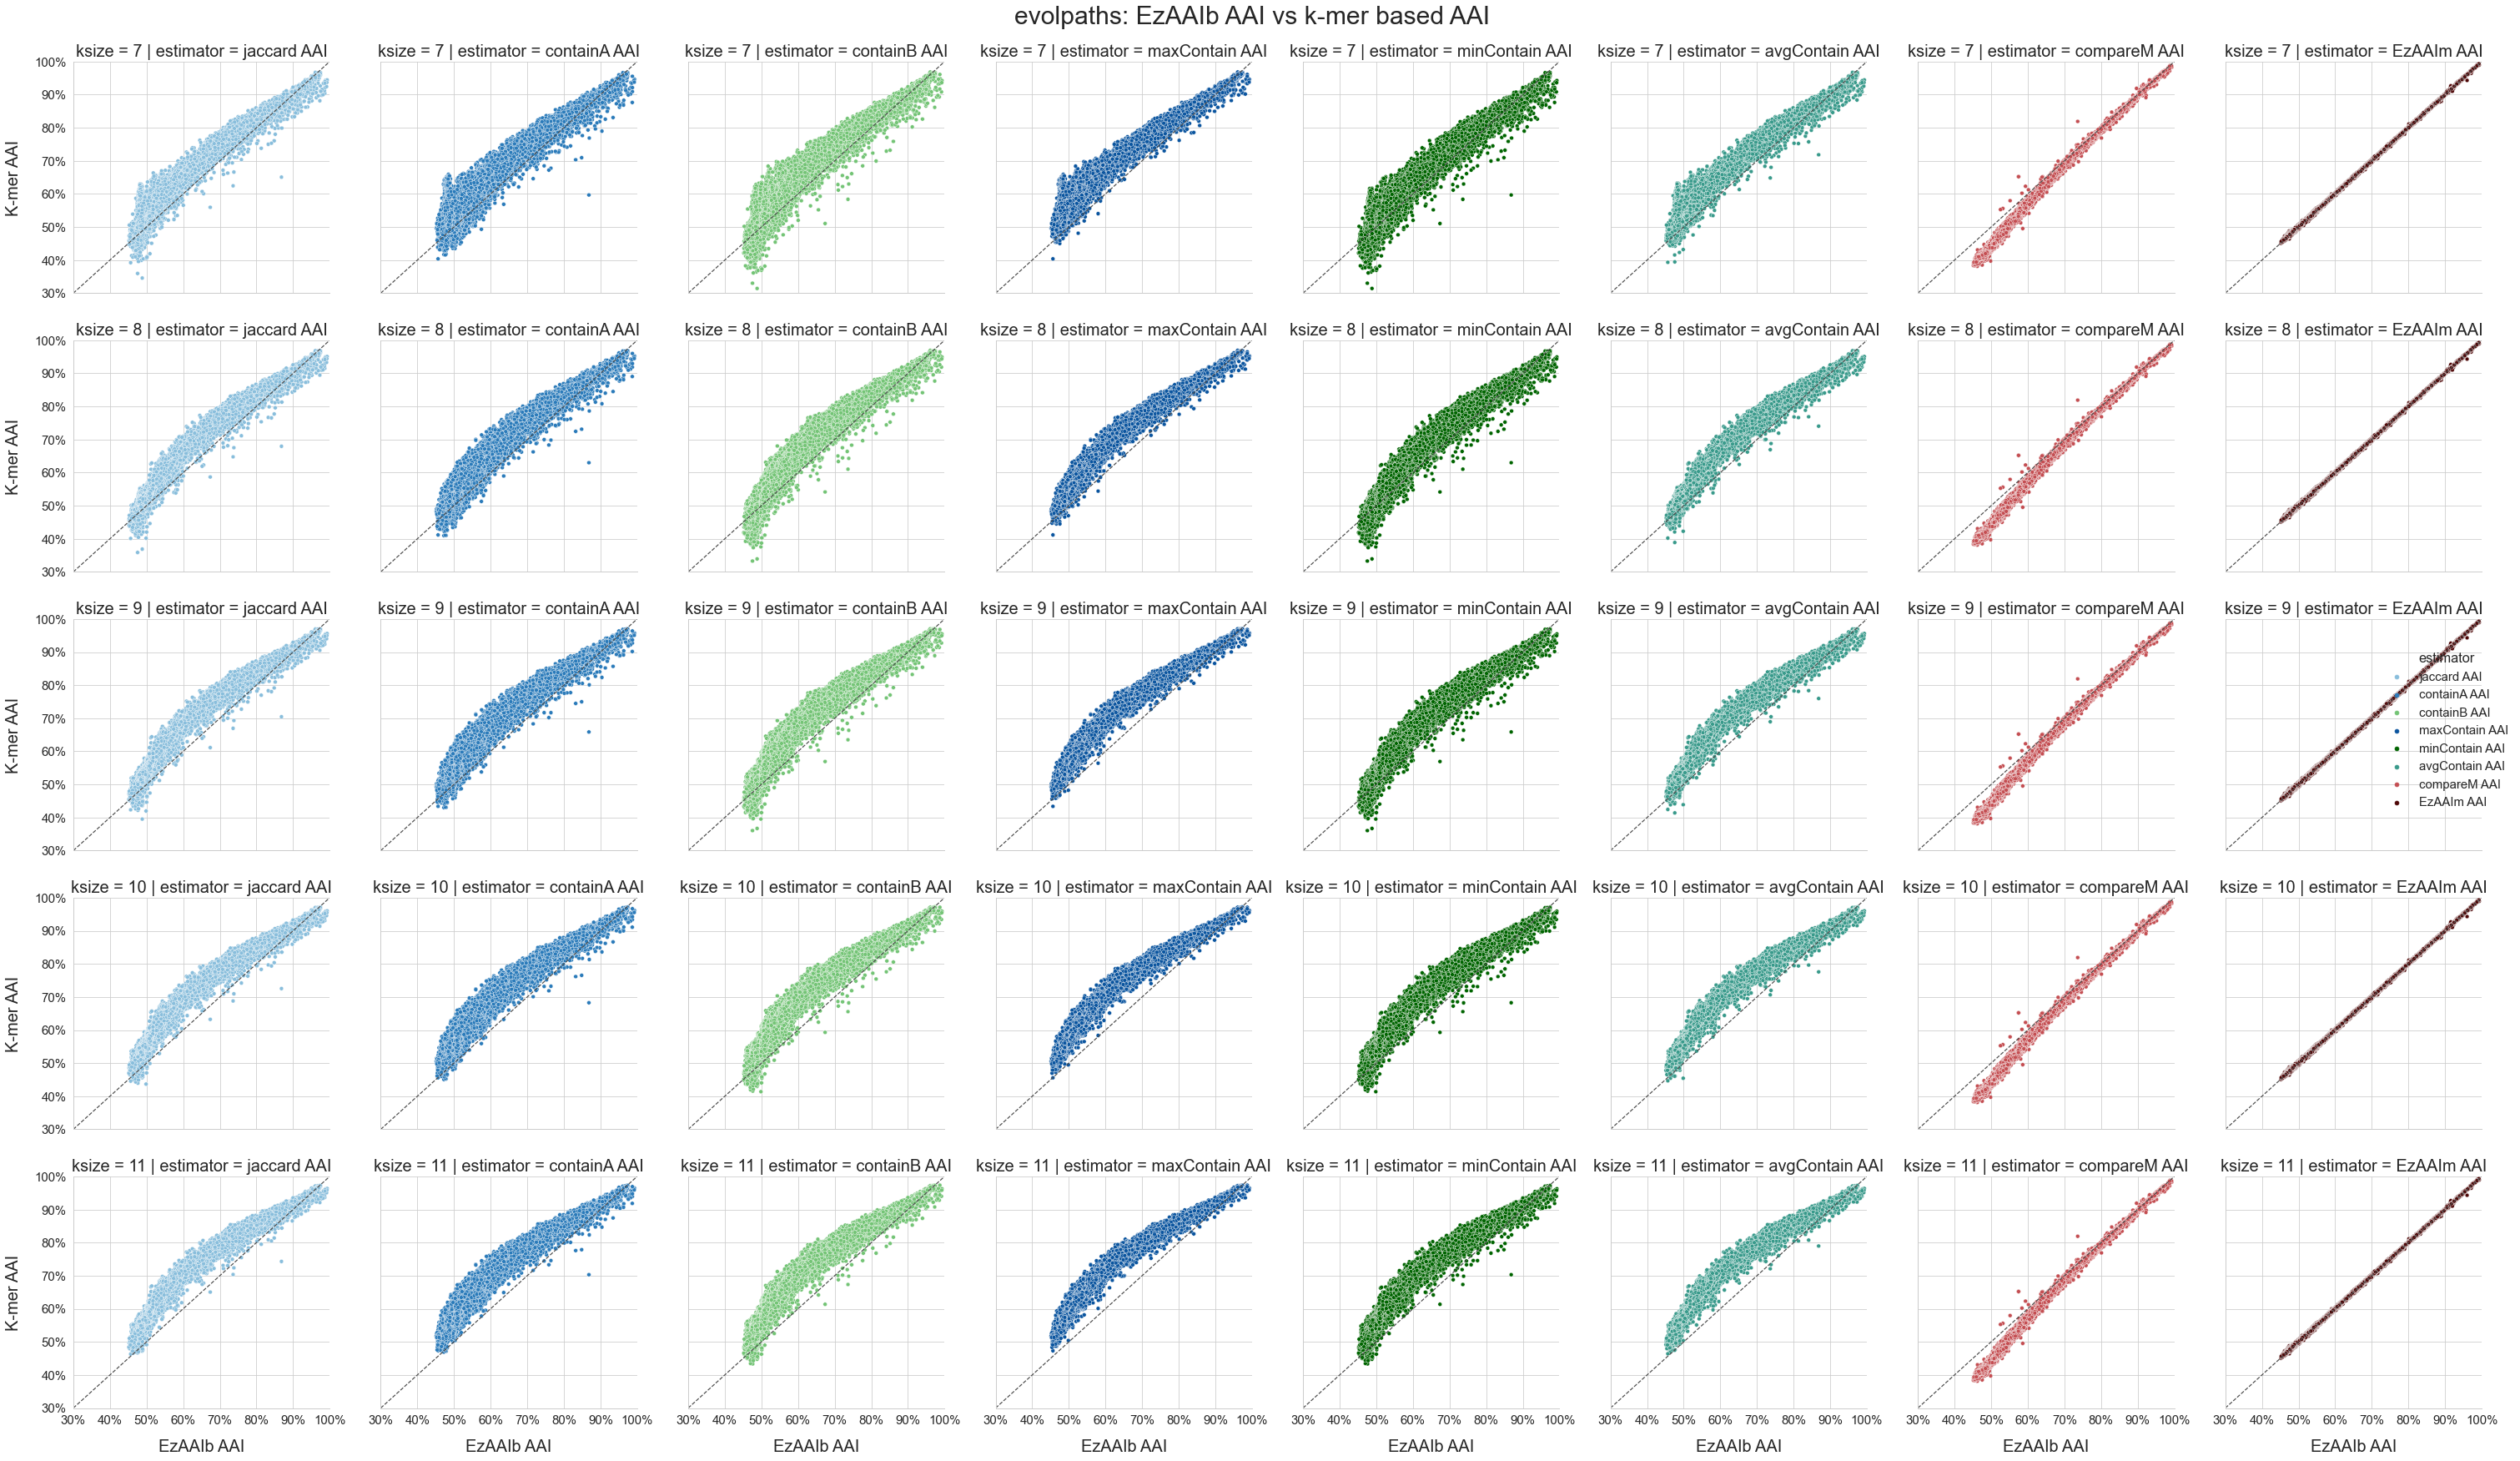

In [83]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=eB_scaled1, 
                  x="EzAAIb AAI", y="AAI", 
                  hue="estimator",col="estimator", 
                  row="ksize", palette=aai_colors)
    
    #plt.gcf().set_size_inches(11, 7)
    xlim=(0.3, 1)
    ylim= (0.3, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    
    g.set_axis_labels("EzAAIb AAI", "K-mer AAI", size=20, labelpad=15)
    g.fig.suptitle('evolpaths: EzAAIb AAI vs k-mer based AAI')
    g.fig.tight_layout()
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

In [100]:
select_estimator = ["avgContain AAI", "maxContain AAI", "compareM AAI", "EzAAIm AAI"]
select_kmer = [7,8,10]

In [101]:
eB_scaled1_select = eB_scaled1[(eB_scaled1["estimator"].isin(select_estimator)) & eB_scaled1["ksize"].isin(select_kmer)]
eB_scaled200_select = eB_scaled200[(eB_scaled200["estimator"].isin(select_estimator)) & eB_scaled200["ksize"].isin(select_kmer)]

In [102]:
eB_scaled1_k10 = eB_scaled1_select[eB_scaled1_select['ksize'] == 10]
eB_scaled1_k7 = eB_scaled1_select[eB_scaled1_select['ksize'] == 7]
eB_scaled1_k8 = eB_scaled1_select[eB_scaled1_select['ksize'] == 8]


eB_scaled200_k10 = eB_scaled200_select[eB_scaled200_select['ksize'] == 10]
eB_scaled200_k7 = eB_scaled200_select[eB_scaled200_select['ksize'] == 7]
eB_scaled200_k8 = eB_scaled200_select[eB_scaled200_select['ksize'] == 8]



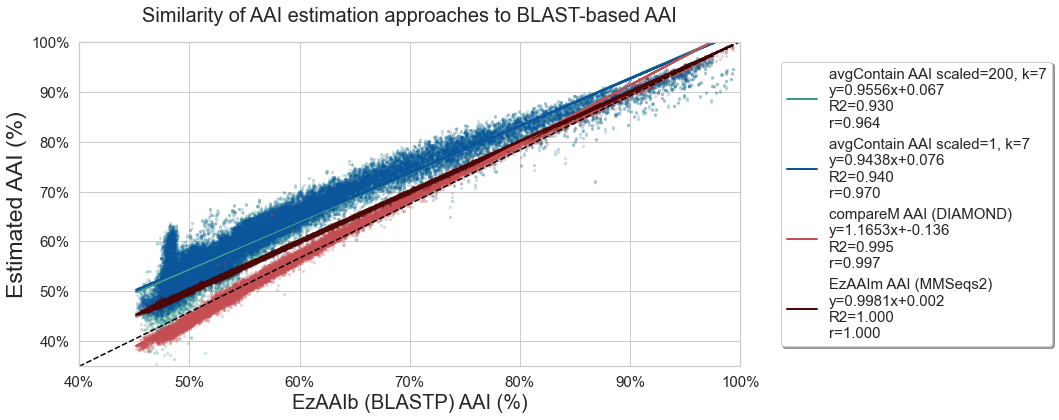

In [116]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

colorD = ["#399a8b","#0b559f"]

dfs = [eB_scaled200_k7,eB_scaled1_k7]
param_labels = ["scaled=200, k=7","scaled=1, k=7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, df in enumerate(dfs):
    df = dfs[n]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAI"
        #color = aai_colors[var]
        color = colorD[n]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.4, 1)#None
ylim= (0.35, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("Estimated AAI (%)", size=23)
ax.set_xlabel("EzAAIb (BLASTP) AAI (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k7.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k7.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

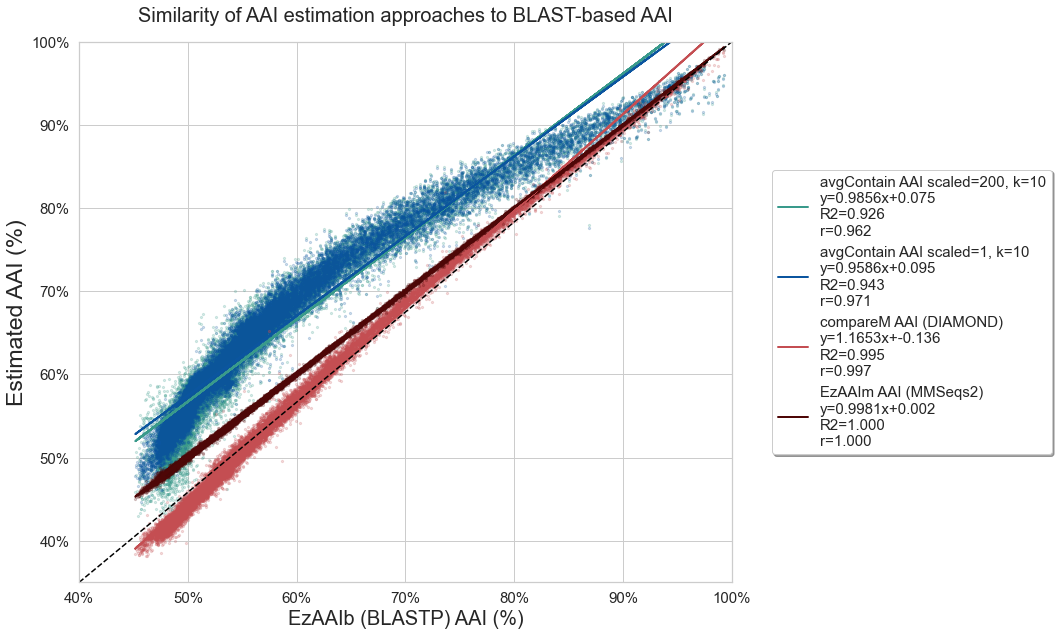

In [115]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

colorD = ["#399a8b","#0b559f"]

dfs = [eB_scaled200_k10,eB_scaled1_k10]
param_labels = ["scaled=200, k=10","scaled=1, k=10"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, df in enumerate(dfs):
    df = dfs[n]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAI"
        #color = aai_colors[var]
        color = colorD[n]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.4, 1)#None
ylim=(0.35, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("Estimated AAI (%)", size=23)
ax.set_xlabel("EzAAIb (BLASTP) AAI (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k10.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k10.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

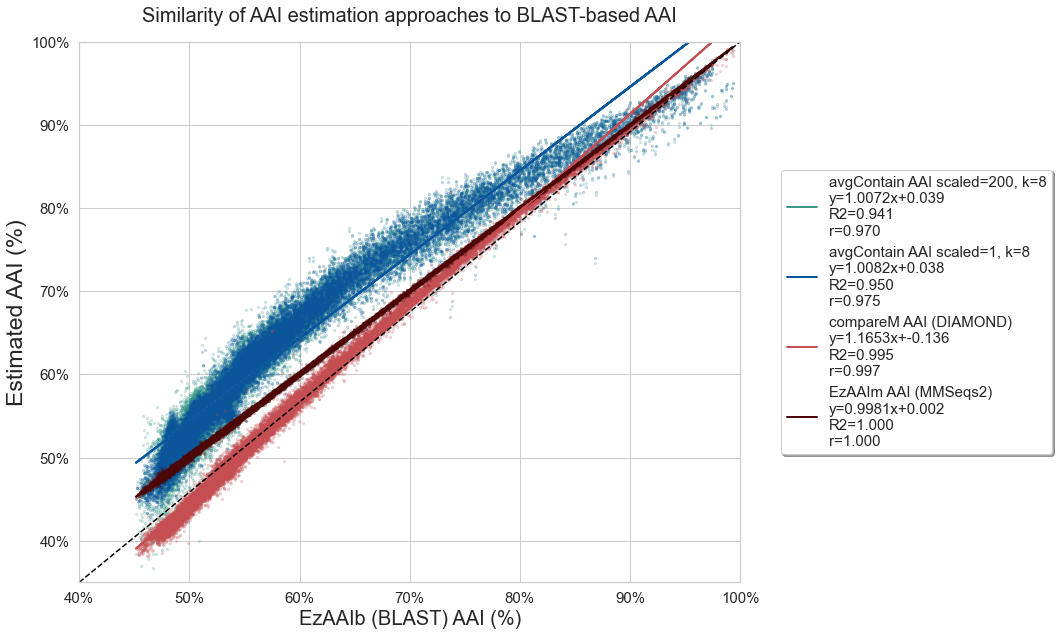

In [114]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

colorD = ["#399a8b","#0b559f"]

dfs = [eB_scaled200_k8,eB_scaled1_k8]
param_labels = ["scaled=200, k=8","scaled=1, k=8"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, df in enumerate(dfs):
    df = dfs[n]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAI"
        #color = aai_colors[var]
        color = colorD[n]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.4, 1)#None
ylim=(0.35, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("Estimated AAI (%)", size=23)
ax.set_xlabel("EzAAIb (BLAST) AAI (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k8.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k8.png", bbox_extra_artists=(lgd,), bbox_inches='tight')